In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iran-protests-2022-tweets/tweets.csv
/kaggle/input/iran-profile-report/iran_report.html
/kaggle/input/all-geocoded-data/block2_geocoding_data.csv
/kaggle/input/all-geocoded-data/block1_geocoding_data.csv
/kaggle/input/all-geocoded-data/block4_geocoding_data.csv
/kaggle/input/all-geocoded-data/block3_geocoding_data.csv
/kaggle/input/natural-earth/ne_110m_admin_0_countries.shx
/kaggle/input/natural-earth/ne_110m_admin_0_countries.shp
/kaggle/input/natural-earth/ne_110m_admin_0_countries.dbf
/kaggle/input/natural-earth/ne_110m_admin_0_countries.prj
/kaggle/input/natural-earth/ne_110m_admin_0_countries.README.html
/kaggle/input/natural-earth/ne_110m_admin_0_countries.VERSION.txt
/kaggle/input/natural-earth/ne_110m_admin_0_countries.cpg
/kaggle/input/all-days-extracted-tweets-unrest-2021/Extracted_south_african_protest_7.csv
/kaggle/input/twitter-black-lives-matter-100k/100000_tweets_BlackLivesMatter_04-03-23.csv
/kaggle/input/natural-earth-provinces/ne_10m_admin_1_states_prov

**Authors:**
​
* [Natan Grayman (2344104)](https://www.kaggle.com/natangrayman)
* [Liad Peretz (2373287)](https://www.kaggle.com/liadperetz)


# **Introduction: 2021 South African Social Unrest**
---

In this notebook, we explore the dynamic intersection of US election tweets and GDELT data. Our analysis will uncover intriguing insights and draw compelling comparisons between social media trends and conventional media coverage of the US election.

**The 2021 South African Unrest** — often referred to as the July 2021 riots — unfolded in South Africa's KwaZulu-Natal and Gauteng provinces from **July 9 to 18, 2021**. This wave of civil unrest was triggered by the imprisonment of former President Jacob Zuma for contempt of court.

For more detailed information about the 2021 South African Unrest, you can visit the [Wikipedia page](https://en.wikipedia.org/wiki/2021_South_African_unrest).

---


1. [Twitter Dataset Analysis](#section-one)

   * [Dataset Summary](#section-one-a)
     * Description of the Twitter Dataset used.
   * [Frequency of words in tweets](#section-one-b)
   * [Number of Tweets per Day](#section-one-c)
   * [Location Analysis](#section-one-d)
   
   
2. [GDELT Analysis](#section-two)
   * [GDELT Description](#section-two-a)
   * [GDELT Exploratory Data Analysis (EDA)](#section-two-b)
   * [Total Number of Mentions per day](#section-two-c)
   * [GDELT Sentiment Analysis](#section-two-d)
   
   
   
3. [Google Trends Data Analysis](#section-three)
    * [Google Trends Description](#section-three-a)
    * [Web Search](#section-three-b)
    * [News Search ](#section-three-c)
   
   
4. [Pattern of Interest Comparisons](#section-four)
    * [Comparison of Number of Tweets and GDELT Articles per Day](#section-four-a)
    
  
5. [Mathematical Framework](#section-five)

6. [Iran Protest 2022](#section-six)

7. [Iran Protests vs SA Unrest](#section-seven)


<a id="section-one"></a>
## **1. Twitter Dataset Analysis**

<a id="section-one-a"></a>
## Dataset Summary


**Source**: The dataset has been collected from an open-source repository available at this site: [Twitter Stream Archive](https://archive.org/search?query=collection%3Atwitterstream&sort=-publicdate).

**Date Range**: The dataset covers a substantial period, ranging from **July 9, 2021**, to **July 21, 2021**.

**Volume**: This dataset is extensive, with approximately **4,000 to 5,000 tweets recorded every minute** during the specified date range.

The dataset provides a comprehensive collection of tweets, capturing a snapshot of social media conversations during a significant time frame. It offers a valuable resource for analyzing and understanding online discourse during the specified period.





In [2]:
csv_file_path= '/kaggle/input/all-days-extracted-tweets-unrest-2021/Extracted_south_african_protest_7.csv'
unrest_tweets2 = pd.read_csv(csv_file_path, low_memory=False)

In [3]:
unrest_tweets2.head()

,Tweet Created At,Tweet ID,Tweet ID String,Tweet Text,Tweet Coordinates,Tweet Quote Count,Tweet Reply Count,Tweet Retweet Count,Tweet Favorite Count,Tweet Language,...,User Screen Name,User Location,User Description,User Followers Count,User Friends Count,User Listed Count,User Favorites Count,User Statuses Count,User Account Created At,User Verified
0,Fri Jul 09 06:46:26 +0000 2021,1413389062518579202,1413389062518579202,RT @Gentlements: #KZNshutdown we want our pres...,NaN,0,0,0,0,en,...,hlalanathinaran,"South Africa, Richards bay",LLB graduate( Unizulu) LLM candidate(UJ) 😁,2560,2995,0,36069,8107,Wed Jul 04 05:21:27 +0000 2018,False
1,Fri Jul 09 07:45:02 +0000 2021,1413403809716473864,1413403809716473864,RT @1BMacM: Things are are tense!\n\nN2 toward...,NaN,0,0,0,0,en,...,MukwaOil,NaN,Headquarters ~ @taembedzwa_mj\n#MUFC 🔴,3239,312,3,41386,41529,Sat Sep 02 17:50:08 +0000 2017,False
2,Fri Jul 09 07:41:39 +0000 2021,1413402958235058176,1413402958235058176,Sangoma \nInyanga\nTraditional Healer\n\n.\n.\...,NaN,0,0,0,0,in,...,SangomaTonda,South Africa,SANGOMA LUKWAGO IN SOUTH AFRICA Email:Sangomal...,98,524,0,75,100,Mon Apr 16 10:31:22 +0000 2018,False
3,Fri Jul 09 08:00:22 +0000 2021,1413407668459515905,1413407668459515905,RT @welloTheblessed: one day nyana they are al...,NaN,0,0,0,0,en,...,Gqeberha_01,📍Azania,...typing,13689,15043,3,70762,72519,Mon Jul 05 13:18:42 +0000 2010,False
4,Fri Jul 09 08:05:38 +0000 2021,1413408993863684100,1413408993863684100,Duduzane Zuma :Niyabesaba nha?\n\nUphi ubaba😂😂...,NaN,0,0,0,0,und,...,curiomisheck,"South Carolina, USA",Youtube @curiomisheck\nFacebook @curiomisheck ...,18512,18892,0,44473,13203,Tue Sep 01 19:46:22 +0000 2015,False


In [4]:
print('There are {} rows and {} columns in the twitter dataset'.format(unrest_tweets2.shape[0],unrest_tweets2.shape[1]))

There are 6245 rows and 23 columns in the twitter dataset


<a id="section-one-c"></a>
## Number of Tweets per Day

/tmp/ipykernel_20/1695348269.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  unrest_tweets2['date'] = pd.to_datetime(unrest_tweets2["Tweet Created At"])  # Convert the 'date' column to datetime


date
2021-07-09 00:00:00+00:00     378
2021-07-10 00:00:00+00:00     577
2021-07-11 00:00:00+00:00     720
2021-07-12 00:00:00+00:00    1805
2021-07-13 00:00:00+00:00    1272
2021-07-14 00:00:00+00:00     676
2021-07-15 00:00:00+00:00     546
2021-07-16 00:00:00+00:00     158
2021-07-17 00:00:00+00:00      73
2021-07-18 00:00:00+00:00      28
2021-07-19 00:00:00+00:00      12
Freq: D, dtype: int64


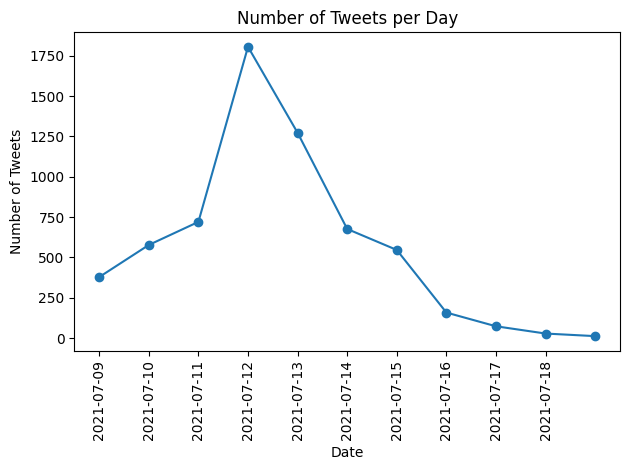

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# Assuming earthquake_tweets is your DataFrame with the 'date' column
unrest_tweets2['date'] = pd.to_datetime(unrest_tweets2["Tweet Created At"])  # Convert the 'date' column to datetime

# Resample the data by day and count the number of tweets
tweets_per_day = unrest_tweets2.resample('D', on='date').size()

print(tweets_per_day)

unrest_tweets_per_day_1 = {"date": tweets_per_day.index,
                          "count": tweets_per_day.values}

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the data
ax.plot(tweets_per_day.index, tweets_per_day.values, marker='o')

# Set the x-axis format to display only the date
date_formatter = DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(date_formatter)

# Set the dates starting from the beginning of the event:
specific_dates = [pd.Timestamp('2021-07-09')]  
date_range = pd.date_range(start='2021-07-10', end='2021-07-18', freq='D')
all_dates = specific_dates + date_range.tolist() 

ax.set_xticks(all_dates)

# # Ensure that the specific date '2023-02-06' is displayed on the x-axis
# ax.axvline(pd.Timestamp('2023-02-06'), color='red', linestyle='--', label='2023-02-06')
# ax.legend()

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Number of Tweets')
ax.set_title('Number of Tweets per Day')

plt.tight_layout()
plt.show()

<a id="section-one-d"></a>
# Location Analysis

In [6]:
import pandas as pd

# Count non-null values in the "Tweet Coordinates" column
non_null_count = unrest_tweets2["Tweet Coordinates"].count()

# Display the count
print("Number of non-null values in 'Tweet Coordinates':", non_null_count)

Number of non-null values in 'Tweet Coordinates': 0


In [7]:
import pandas as pd

# Print the first 5 rows of the "User Location" column
print("Sample of 'User Location' column:")
print(unrest_tweets2["User Location"].head())

# Check the datatype of the "User Location" column
data_type = unrest_tweets2["User Location"].dtype
print("\nDatatype of 'User Location' column:", data_type)


Sample of 'User Location' column:
0    South Africa, Richards bay
1                           NaN
2                  South Africa
3                       📍Azania
4           South Carolina, USA
Name: User Location, dtype: object

Datatype of 'User Location' column: object


In [8]:
import pandas as pd

# Count non-null values in the "Tweet Coordinates" column
non_null_count = unrest_tweets2["User Location"].count()

# Display the count
print("Number of non-null values in 'User Location':", non_null_count)

# Filter rows with non-null values in the "User Location" column
non_null_user_location_df = unrest_tweets2[unrest_tweets2["User Location"].notnull()]

# Check the size (number of rows and columns)
num_rows, num_columns = non_null_user_location_df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

# Check for null values in the "User Location" column
null_values_count = non_null_user_location_df["User Location"].isnull().sum()
print("Number of null values in 'User Location' column:", null_values_count)


Number of non-null values in 'User Location': 4687
Number of rows: 4687
Number of columns: 24
Number of null values in 'User Location' column: 0


**Test code for API to resolve locations into longitude and latitute:**

In [9]:
# import os
# import pandas as pd
# from geopy.geocoders import Nominatim

# # Define the geocoding function
# def geocode_location(location):
#     geolocator = Nominatim(user_agent="Investigation Project")
#     try:
#         location = geolocator.geocode(location)
#         return (location.longitude, location.latitude)
#     except AttributeError:
#         return None

# # Test the geocoding function with a sample location
# sample_location = "South Africa, Cape Town"

# # Call the geocoding function and print the result
# result = geocode_location(sample_location)

# if result is not None:
#     longitude, latitude = result
#     print(f"Longitude: {longitude}, Latitude: {latitude}")

#     # Create a DataFrame from the geocoding result
#     data = {'Location': [sample_location], 'Longitude': [longitude], 'Latitude': [latitude]}
#     df = pd.DataFrame(data)

#     # Define the output directory
#     output_dir = '/kaggle/working/'

#     # Save the DataFrame to a CSV file in the output directory
#     output_filename = 'geocoding_result.csv'
#     output_filepath = os.path.join(output_dir, output_filename)
#     df.to_csv(output_filepath, index=False)

#     print(f"Geocoding result saved to {output_filepath}")
# else:
#     print("Location not found or there was an issue with geocoding.")


**The following code is used to query the Nominatim API to resolve the locations to longitudes and latitude for plotting. However, within the data, errors arose from the queries, so the data has been split into blocks to isolate which part of the data is corrupted/producing the query error. Each block of the overall data is stored in a csv which in turn will be combined.**

In [10]:
# import os
# import pandas as pd
# from geopy.geocoders import Nominatim
# from geopy.exc import GeocoderQueryError

# def geocode_and_save_block(user_locations, block_number, batch_size=100):
#     # Define a function to geocode user locations to latitude and longitude
#     def geocode_location_batch(locations, batch_size=batch_size):
#         geolocator = Nominatim(user_agent="SA Tweets from Social Unrest")
#         total_locations = len(locations)
#         geocoded_data = []
        
#         # Define a counter to keep track of successful geocoded locations
#         geocoded_count = 0

#         for i in range(0, total_locations, batch_size):
#             batch_locations = locations[i:i + batch_size]
#             batch_results = []

#             for location in batch_locations:
#                 try:
#                     result = geolocator.geocode(location, timeout=10)  # Increase timeout
#                     if result:
#                         batch_results.append((location, result.longitude, result.latitude))
#                         geocoded_count += 1
#                 except (AttributeError, GeocoderQueryError) as e:
#                     print(f"Error geocoding location: {location} - {str(e)}")

#             geocoded_data.extend(batch_results)
#             print(f"Geocoded {geocoded_count} of {total_locations} locations.")

#         return geocoded_data

#     # Split the data into four blocks
#     total_data = len(user_locations)
#     block_size = total_data // 4  # Divide the data into 4 equal blocks

#     if block_number not in [1, 2, 3, 4]:
#         raise ValueError("Block number should be 1, 2, 3, or 4.")

#     # Choose the specified block
#     block = user_locations[(block_number - 1) * block_size:block_number * block_size]

#     # Batch geocode the specified block of user locations
#     geocoded_results = geocode_location_batch(block)

#     # Create a DataFrame from the geocoded results
#     geocoded_df = pd.DataFrame(geocoded_results, columns=["User Location", "Longitude", "Latitude"])

#     # Define the output CSV file path
#     output_directory = '/kaggle/working/'
#     output_filename = f'block{block_number}_geocoding_data.csv'
#     output_filepath = os.path.join(output_directory, output_filename)

#     # Save the geocoded data to a CSV file
#     geocoded_df.to_csv(output_filepath, index=False)
#     print(f"Geocoded data saved to {output_filepath}")

#     print(f"Geocoding completed successfully for block {block_number}.")

# # Extract the 'User Location' column as a list
# user_locations = non_null_user_location_df["User Location"].tolist()

# # Specify which block to geocode and save (e.g., block_number=1)
# geocode_and_save_block(user_locations, block_number=1)


In [11]:
import pandas as pd
import os

# Define the directory path where the CSV files are located
directory = '/kaggle/input/all-geocoded-data/'

# Define the file names of the CSV files
file_names = [
    'block1_geocoding_data.csv',
    'block2_geocoding_data.csv',
    'block3_geocoding_data.csv',
    'block4_geocoding_data.csv'
]

# Initialize an empty list to store DataFrames
data_frames = []

# Define a function to preprocess the CSV data
def preprocess_csv(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Initialize lists to store valid longitude and latitude values
    valid_longitude = []
    valid_latitude = []

    for line in lines[1:]:
        values = line.strip().split(',')
        # Check if there are at least 2 values (longitude and latitude)
        if len(values) >= 2:
            # Attempt to convert longitude and latitude to floats
            try:
                longitude = float(values[-2])
                latitude = float(values[-1])
                valid_longitude.append(longitude)
                valid_latitude.append(latitude)
            except ValueError:
                # Skip lines with invalid longitude or latitude values
                continue

    # Create a DataFrame from the valid longitude and latitude values
    df = pd.DataFrame({'Longitude': valid_longitude, 'Latitude': valid_latitude})

    return df

for file_name in file_names:
    print(f"Reading file: {file_name}")
    file_path = directory + file_name
    # Preprocess the CSV file
    df = preprocess_csv(file_path)
    data_frames.append(df)

# Concatenate the DataFrames vertically to combine them
combined_df = pd.concat(data_frames, ignore_index=True)

# Display key features of the combined DataFrame
print("Head of the Combined DataFrame:")
print(combined_df.head())

print("\nNumber of Rows and Columns in the Combined DataFrame:")
print(combined_df.shape)

# Now, you have the combined DataFrame containing only valid longitude and latitude.

Reading file: block1_geocoding_data.csv
Reading file: block2_geocoding_data.csv
Reading file: block3_geocoding_data.csv
Reading file: block4_geocoding_data.csv
Head of the Combined DataFrame:
   Longitude   Latitude
0  32.057778 -28.770786
1  24.991639 -28.816624
2  39.266707  -6.914535
3 -80.436374  33.687439
4  28.049722 -26.205000

Number of Rows and Columns in the Combined DataFrame:
(4057, 2)


/tmp/ipykernel_20/2285156072.py:17: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


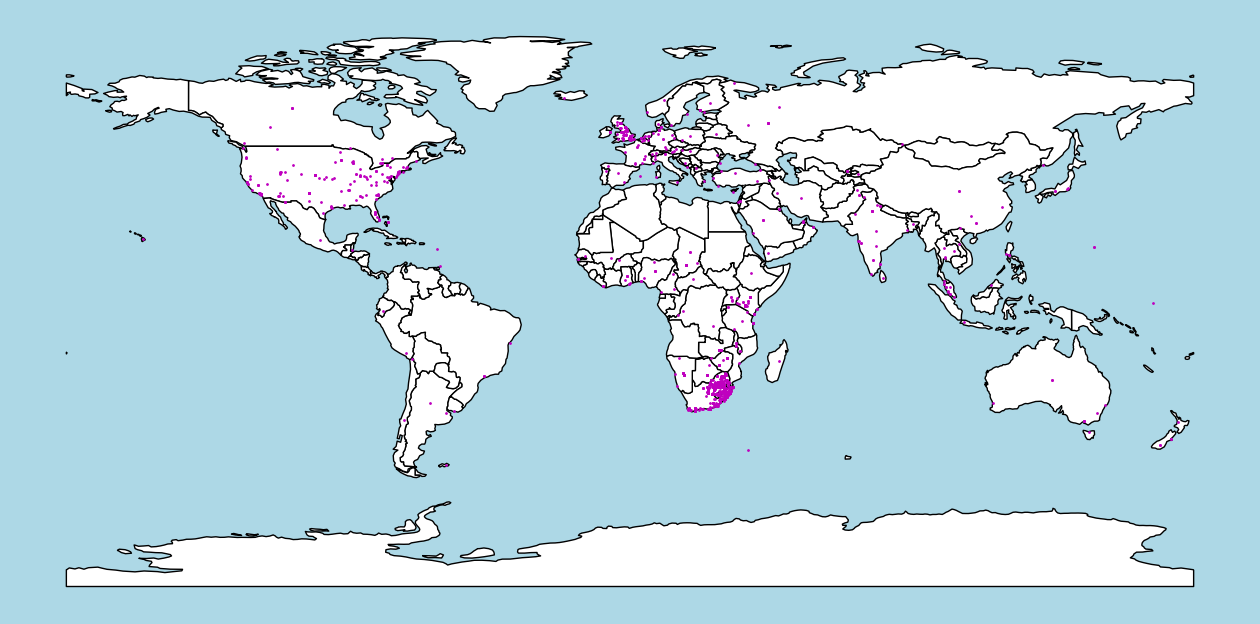

In [12]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt


# Create Point geometries using Shapely
geometry = [Point(xy) for xy in zip(combined_df['Longitude'], combined_df['Latitude'])]

# Create a GeoDataFrame
crs = 'EPSG:4326'  # Assuming the coordinates are in WGS 84
geo_df = gpd.GeoDataFrame(combined_df, crs=crs, geometry=geometry)

# Download world shapefile from GeoPandas datasets (if not already downloaded)
# gpd.datasets.get_path('naturalearth_lowres').to_csv("path_to_shapefile.zip")
 
# Load world shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Create subplots
fig, ax = plt.subplots(1, figsize=(16, 8), facecolor='lightblue')

# Plot the world map with white color
world.plot(ax=ax, color='white', edgecolor='black')

# Plot your geo_df data
geo_df.plot(ax=ax, markersize=1, color='m', marker='o')

# Turn off the axis
ax.axis('off')

# Show the plot
plt.show()

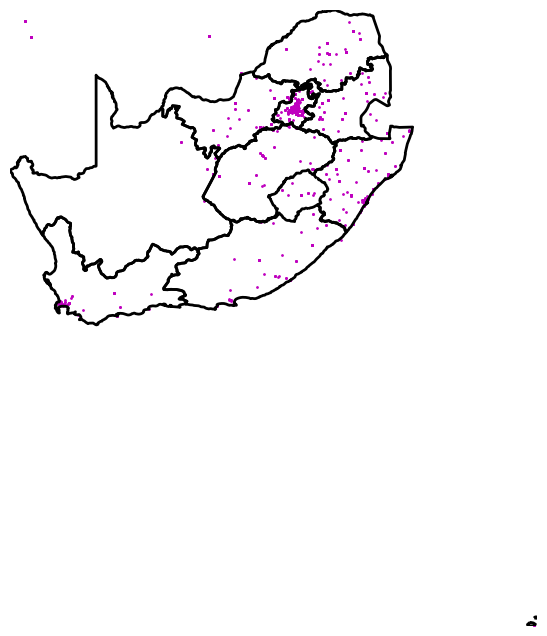

In [13]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt


# Create Point geometries using Shapely
geometry = [Point(xy) for xy in zip(combined_df['Longitude'], combined_df['Latitude'])]

# Create a GeoDataFrame
crs = 'EPSG:4326'  # Assuming the coordinates are in WGS 84
geo_df = gpd.GeoDataFrame(combined_df, crs=crs, geometry=geometry)

# Load South African provinces shapefile
sa_provinces = gpd.read_file('/kaggle/input/natural-earth-provinces/ne_10m_admin_1_states_provinces.shp')

# Filter the shapefile to get only South Africa
south_africa = sa_provinces[sa_provinces['admin'] == 'South Africa']

# Get the bounding box of South Africa
sa_bbox = south_africa.bounds

# Set the map extent to cover South Africa's bounding box
fig, ax = plt.subplots(1, figsize=(16, 8), facecolor='white')
ax.set_xlim([sa_bbox.minx.min(), sa_bbox.maxx.max()])
ax.set_ylim([sa_bbox.miny.min(), sa_bbox.maxy.max()])

# Plot the South African provinces
south_africa.boundary.plot(ax=ax, linewidth=2, color='black')

# Plot your geo_df data within the bounds of South Africa
geo_df.plot(ax=ax, markersize=1, color='m', marker='o')

# Turn off the axis
ax.axis('off')

# Show the plot
plt.show()


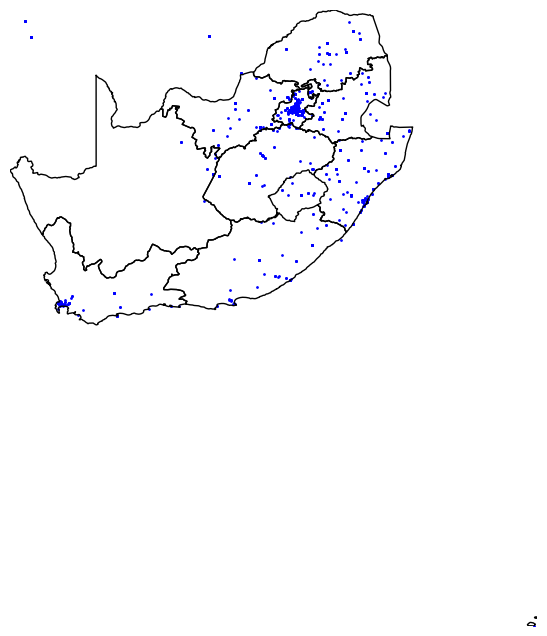

In [14]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Create Point geometries using Shapely
geometry = [Point(xy) for xy in zip(combined_df['Longitude'], combined_df['Latitude'])]

# Create a GeoDataFrame
crs = 'EPSG:4326'  # Assuming the coordinates are in WGS 84
geo_df = gpd.GeoDataFrame(combined_df, crs=crs, geometry=geometry)

# Load South African provinces shapefile
sa_provinces = gpd.read_file('/kaggle/input/natural-earth-provinces/ne_10m_admin_1_states_provinces.shp')

# Filter the shapefile to get only South Africa
south_africa = sa_provinces[sa_provinces['admin'] == 'South Africa']

# Get the bounding box of South Africa
sa_bbox = south_africa.bounds
# Set the map extent to cover South Africa's bounding box
fig, ax = plt.subplots(1, figsize=(16, 8), facecolor='white')
ax.set_xlim([sa_bbox.minx.min(), sa_bbox.maxx.max()])
ax.set_ylim([sa_bbox.miny.min(), sa_bbox.maxy.max()])

# Plot the South African provinces with lighter border lines
south_africa.boundary.plot(ax=ax, linewidth=1, color='black', edgecolor='gray')  # Adjust linewidth and edgecolor

# Plot your geo_df data within the bounds of South Africa
geo_df.plot(ax=ax, markersize=1, color='b', marker='o')

# Turn off the axis
ax.axis('off')

# Show the plot
plt.show()


In [15]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Your code to create geo_df and set up the world map goes here...

# Count the number of plotted points for the entire world
num_points_world = len(geo_df)

# Filter geo_df to include only points within the bounds of South Africa
geo_df_sa = geo_df.cx[sa_bbox.minx.min():sa_bbox.maxx.max(), sa_bbox.miny.min():sa_bbox.maxy.max()]

# Count the number of plotted points for South Africa
num_points_sa = len(geo_df_sa)

# Show the counts
print(f"Number of plotted points in the entire world: {num_points_world}")
print(f"Number of plotted points in South Africa: {num_points_sa}")

# Show the plot
plt.show()


Number of plotted points in the entire world: 4057
Number of plotted points in South Africa: 3319


<a id="section-two"></a>
#  **Global Database of Events, Language, and Tone (GDELT)**

<a id="section-two-a"></a>
The Global Database of Events, Language, and Tone (GDELT) is a comprehensive and continuously updated dataset that monitors and records various global events, news articles, and media sources from around the world. GDELT's primary purpose is to provide a vast repository of structured data that researchers, analysts, and data scientists can use to analyze and gain insights into global events, trends, and sentiments.
​
Key features of GDELT include:
​
- **Event Data**: GDELT captures a wide range of events, including political, economic, social, and cultural events, across different countries and regions.
​
- **Media Monitoring**: GDELT scans thousands of news articles, broadcasts, and online sources in multiple languages to extract valuable information.
​
- **Sentiment Analysis**: It includes sentiment analysis and tone indicators, helping to understand the emotional context of news and events.
​
- **Temporal Coverage**: GDELT's data goes back several decades, allowing users to explore historical trends and patterns.
​
- **Geospatial Information**: The dataset includes geospatial information, enabling the mapping of events and their locations.
​
https://www.gdeltproject.org/
​

The Global Database of Events, Language, and Tone (GDELT) is a comprehensive and continuously updated dataset that monitors and records various global events, news articles, and media sources from around the world. GDELT's primary purpose is to provide a vast repository of structured data that researchers, analysts, and data scientists can use to analyze and gain insights into global events, trends, and sentiments.
                                                                                                                                                                                                               

<a id="section-two-b"></a>
# GDELT Exploratory Data Analysis (EDA)

In [16]:
import pandas as pd

 

# Define the directory and file name
directory = "south-africa-gdelts-riots-2021"
file_name = "Query_riots_2021_test6_allColumns.csv"

 

# Create the full file path
file_path = "/kaggle/input/south-africa-gdelt-riots-2021/Query_roits_2021_test6_allColumns.csv"

 

# Load the dataset into a Pandas DataFrame
try:
    df = pd.read_csv(file_path)
    
    # Display the main specifications of the dataset
    print("Dataset Specifications:")
    print(f"File Path: {file_path}")
    print(f"Number of Rows: {len(df)}")
    print(f"Number of Columns: {len(df.columns)}")
    print("Column Names:")
    for column in df.columns:
        print(f" - {column}")
    print("Data Types:")
    for column, dtype in df.dtypes.items():
        print(f" - {column}: {dtype}")
#     print("Summary Statistics:")
#     print(df.describe())
except FileNotFoundError:
    print(f"File '{file_path}' not found.")
except Exception as e:
    print(f"An error occurred: {str(e)}")

Dataset Specifications:
File Path: /kaggle/input/south-africa-gdelt-riots-2021/Query_roits_2021_test6_allColumns.csv
Number of Rows: 2887
Number of Columns: 61
Column Names:
 - GLOBALEVENTID
 - SQLDATE
 - MonthYear
 - Year
 - FractionDate
 - Actor1Code
 - Actor1Name
 - Actor1CountryCode
 - Actor1KnownGroupCode
 - Actor1EthnicCode
 - Actor1Religion1Code
 - Actor1Religion2Code
 - Actor1Type1Code
 - Actor1Type2Code
 - Actor1Type3Code
 - Actor2Code
 - Actor2Name
 - Actor2CountryCode
 - Actor2KnownGroupCode
 - Actor2EthnicCode
 - Actor2Religion1Code
 - Actor2Religion2Code
 - Actor2Type1Code
 - Actor2Type2Code
 - Actor2Type3Code
 - IsRootEvent
 - EventCode
 - EventBaseCode
 - EventRootCode
 - QuadClass
 - GoldsteinScale
 - NumMentions
 - NumSources
 - NumArticles
 - AvgTone
 - Actor1Geo_Type
 - Actor1Geo_FullName
 - Actor1Geo_CountryCode
 - Actor1Geo_ADM1Code
 - Actor1Geo_ADM2Code
 - Actor1Geo_Lat
 - Actor1Geo_Long
 - Actor1Geo_FeatureID
 - Actor2Geo_Type
 - Actor2Geo_FullName
 - Actor2Geo_C

<a id="section-two-c"></a>
# Total Number of Mentions per day

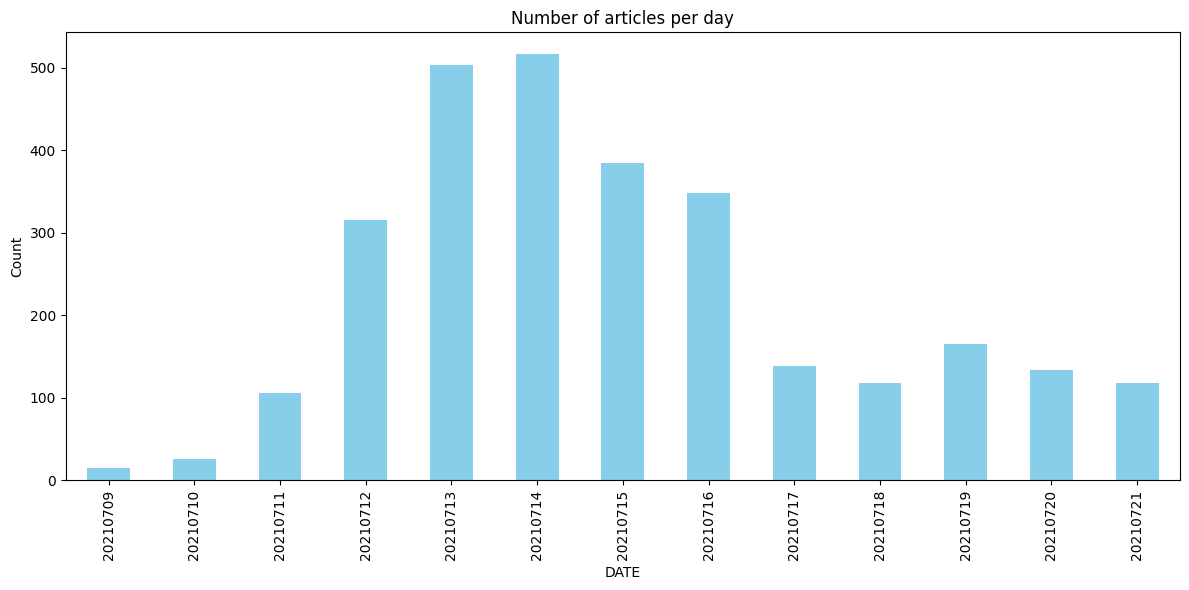

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/kaggle/input/south-africa-gdelt-riots-2021/Query_roits_2021_test6_allColumns.csv"
df = pd.read_csv(file_path)

# Group the data by SQLDATE and count the number of data points for each date
date_counts = df['SQLDATE'].value_counts().sort_index()

# Create a bar graph
plt.figure(figsize=(12, 6))
date_counts.plot(kind='bar', color='skyblue')
plt.title('Number of articles per day')
plt.xlabel('DATE')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

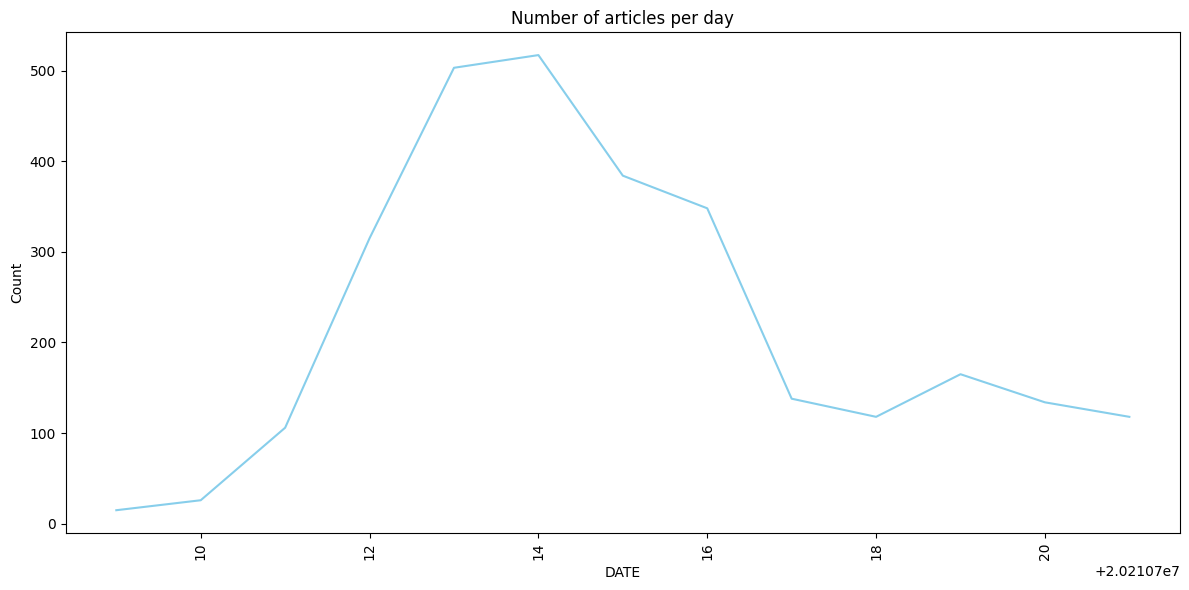

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/kaggle/input/south-africa-gdelt-riots-2021/Query_roits_2021_test6_allColumns.csv"
df = pd.read_csv(file_path)

# Group the data by SQLDATE and count the number of data points for each date
date_counts = df['SQLDATE'].value_counts().sort_index()

# Create a line graph
plt.figure(figsize=(12, 6))
date_counts.plot(kind='line', color='skyblue')
plt.title('Number of articles per day')
plt.xlabel('DATE')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


**Number of Mentions of the Article per day**

**Definition of NumMentions:**
NumMentions=	(NULLABLE;	INTEGER)	This is the total number of mentions of this event across all source documents during the 15 minute update in which it was first seen. Multiple references to an event within a single document also contribute to this count. This can be used as a method of assessing the “importance” of an event: the more discussion of that event, the more likely it is to be significant. The total universe of source documents and the density of events within them vary over time, so it is recommended that this field be normalized by the average or other measure of the universe of events during the time period of interest. This field is actually a composite score of the total number of raw mentions and the number of mentions extracted from reprocessed versions of each article (see the discussion for the Mentions table). NOTE: this field refers only to the first news report to mention an event and is not updated if the event is found in a different context in other news reports. It is included for legacy purposes – for more precise information on the positioning of an event, see the Mentions table.

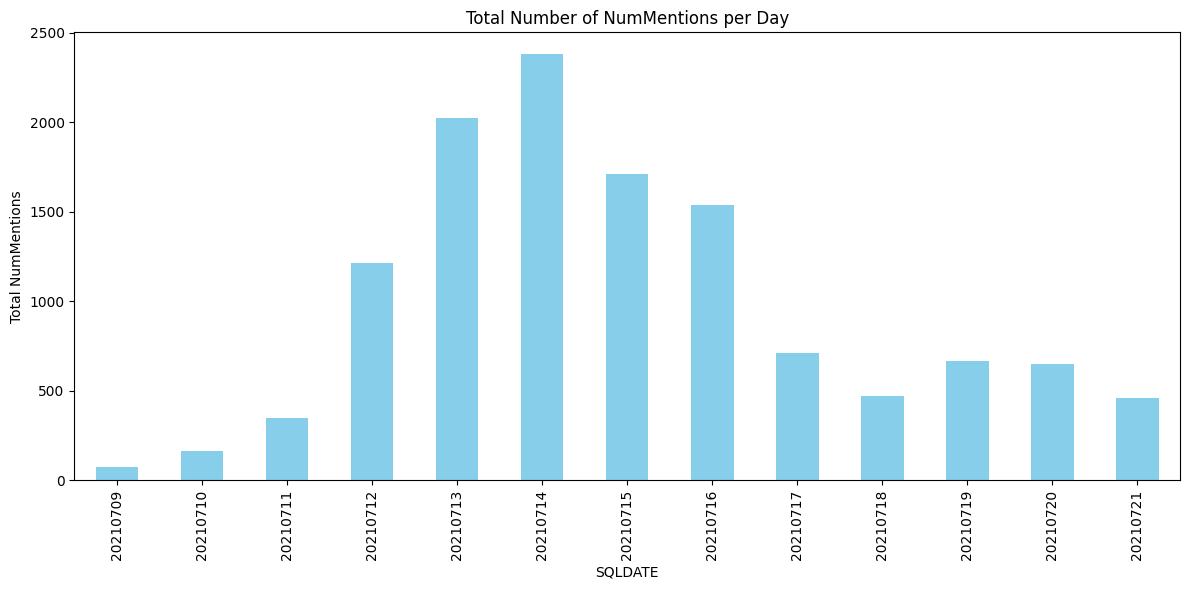

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/kaggle/input/south-africa-gdelt-riots-2021/Query_roits_2021_test6_allColumns.csv"
df = pd.read_csv(file_path)

# Group the data by SQLDATE and sum the NumMentions for each date
date_mentions = df.groupby('SQLDATE')['NumMentions'].sum()

# Create a bar graph
plt.figure(figsize=(12, 6))
date_mentions.plot(kind='bar', color='skyblue')
plt.title('Total Number of NumMentions per Day')
plt.xlabel('SQLDATE')
plt.ylabel('Total NumMentions')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<a id="section-two-d"></a>
# GDELT Sentiment Analysis 

**Distribution of sentiment of articles**
This uses the the column title AvgTone to gauge the sentiment.

**Definition of AvgTone:**
AvgTone=	(NULLABLE;	FLOAT)	This is the average “tone” of all documents containing one or more mentions of this event during the 15 minute update in which it was first seen. The score ranges from -100 (extremely negative) to +100 (extremely positive). Common values range between -10 and +10, with 0 indicating neutral. This can be used as a method of filtering the “context” of events as a subtle measure of the importance of an event and as a proxy for the “impact” of that event. For example, a riot event with a slightly negative average tone is likely to have been a minor occurrence, whereas if it had an extremely negative average tone, it suggests a far more serious occurrence. A riot with a positive score likely suggests a very minor occurrence described in the context of a more positive narrative (such as a report of an attack occurring in a discussion of improving conditions on the ground in a country and how the number of attacks per day has been greatly reduced). NOTE: this field refers only to the first news report to mention an event and is not updated if the event is found in a different context in other news reports. It is included for legacy purposes – for more precise information on the positioning of an event, see the Mentions table. NOTE: this provides only a basic tonal assessment of an article and it is recommended that users interested in emotional measures use the Mentions and Global Knowledge Graph tables to merge the complete set of 2,300 emotions and themes from the GKG GCAM system into their analysis of event records. (Source: GDELT database)

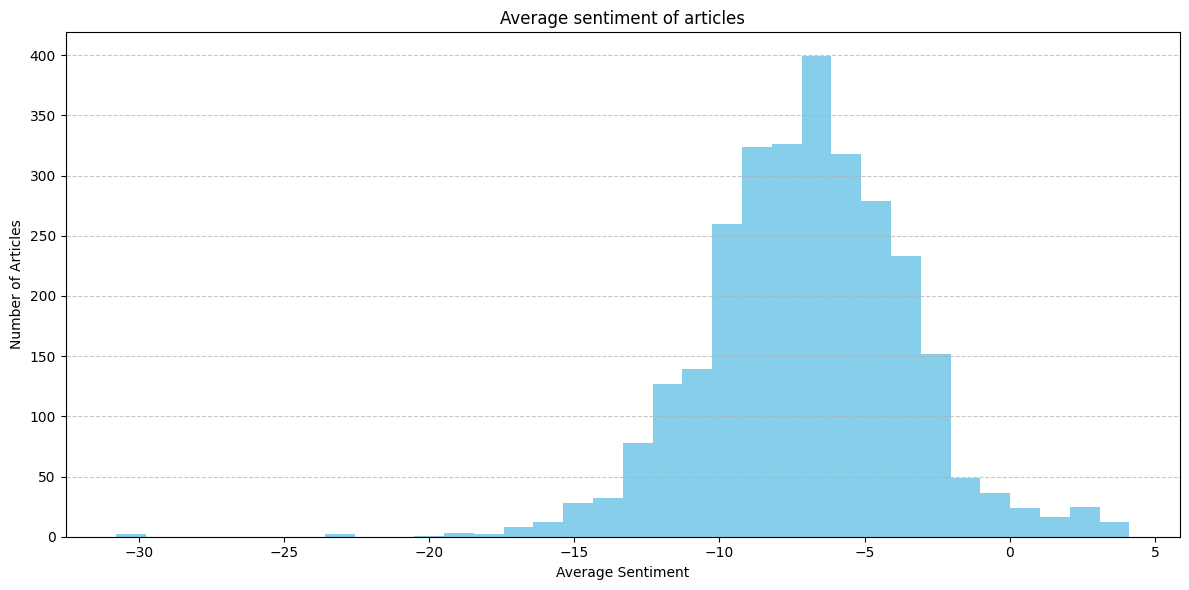

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/kaggle/input/south-africa-gdelt-riots-2021/Query_roits_2021_test6_allColumns.csv"
df = pd.read_csv(file_path)

# Create a histogram of AvgTone with a bin width of 1 unit
bin_width = 1.0
plt.figure(figsize=(12, 6))
plt.hist(df['AvgTone'], bins=int((df['AvgTone'].max() - df['AvgTone'].min()) / bin_width), color='skyblue')
plt.title('Average sentiment of articles')
plt.xlabel('Average Sentiment')
plt.ylabel('Number of Articles')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



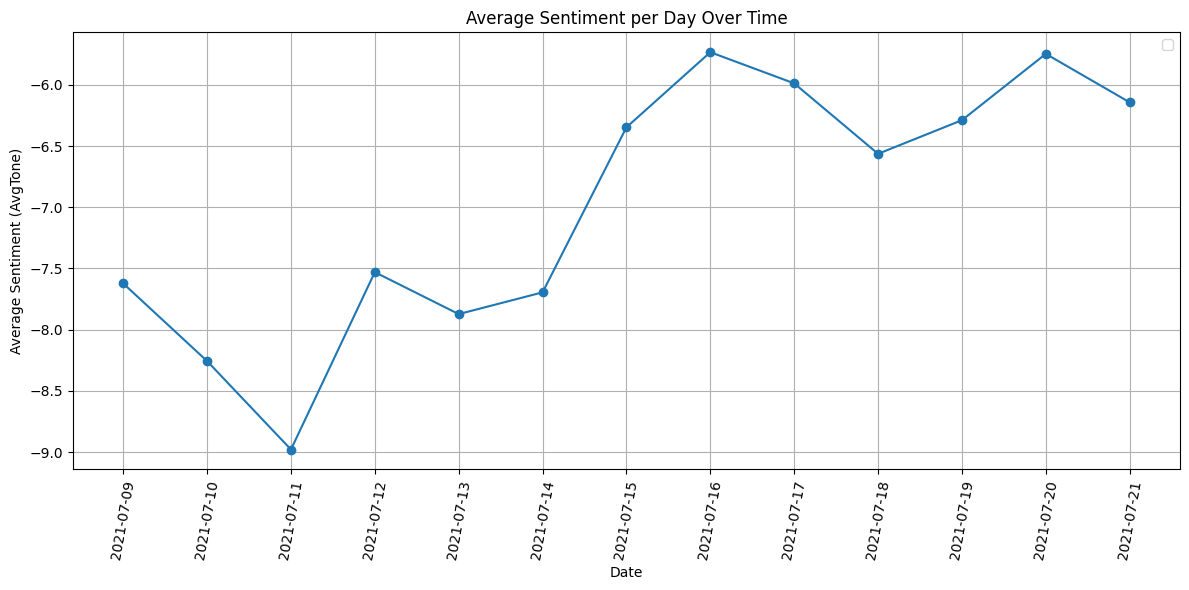

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

start_date = ''
end_date = ''

# Load the dataset
file_path = "/kaggle/input/south-africa-gdelt-riots-2021/Query_roits_2021_test6_allColumns.csv"
df = pd.read_csv(file_path, parse_dates=['SQLDATE'])

# Group the data by date and calculate the average sentiment (AvgTone) for each day
average_sentiment_per_day = df.groupby('SQLDATE')['AvgTone'].mean()

# Plot the average sentiment over time
plt.figure(figsize=(12, 6))
plt.plot(average_sentiment_per_day.index, average_sentiment_per_day.values, marker='o', linestyle='-')
plt.title('Average Sentiment per Day Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment (AvgTone)')
plt.grid(True)

# Set the date range from '2020-10-15' to '2020-11-08'
date_range = pd.date_range(start='2021-07-09', end='2021-07-21', freq='D')
all_dates = date_range.tolist()

# # Set the x-axis ticks to match the SQLDATE values
# dates_to_highlight = ["2020-11-03", "2020-11-07", "2020-10-22"]  # Add your desired dates here
# title_of_dates = ["Election Day", "Highest Tweets", "Final Presidential Debate"]
# colors = ["red", "green", "yellow"]

# # Calculate the positions for evenly spaced x-axis ticks
# x_positions = [average_sentiment_per_day.index.get_loc(date) for date in dates_to_highlight]

# for i, date in enumerate(dates_to_highlight):
#     title = title_of_dates[i]
#     color = colors[i]
#     date_current = dates_to_highlight[i]
#     position = pd.Timestamp(date_current)
#     plt.axvline(x=position, color=color, linestyle='--', label=title)

# Set the x-axis ticks to be all_dates and their labels
plt.xticks(all_dates, [date.strftime('%Y-%m-%d') for date in all_dates], rotation=45)

plt.xticks(rotation=80)
# Show the plot
plt.tight_layout()
plt.legend()
plt.show()


<a id="section-three"></a>
# **3. Google Trends Data Analysis**

For the Google Trends analysis conducted, we focused on the search interest of three key keywords:

1. **Looting**
2. **State of Emergency**
3. **Protest**

These keywords were selected to examine the search interest and popularity trends surrounding the 2023, Social Unrest in South Africa.

<a id="section-three-b"></a>
## Web Search

[Google Trends Analysis: Looting,State of Emergency, Protest](https://trends.google.com/trends/explore?date=2021-07-09%202021-07-21&geo=ZA&q=Looting,State%20of%20Emergency,Protest)

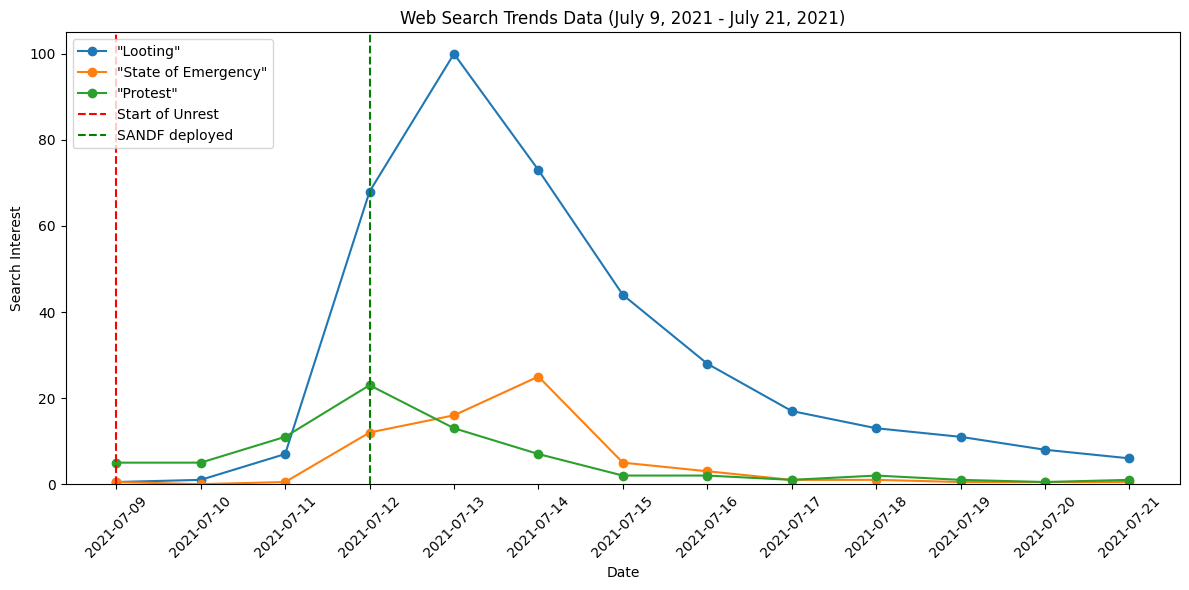

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

# Create a string with the CSV data
csv_data = """Day,Looting_web,State of emergency_web,Protest_web
2021-07-09,<1,<1,5
2021-07-10,1,0,5
2021-07-11,7,<1,11
2021-07-12,68,12,23
2021-07-13,100,16,13
2021-07-14,73,25,7
2021-07-15,44,5,2
2021-07-16,28,3,2
2021-07-17,17,1,1
2021-07-18,13,1,2
2021-07-19,11,<1,1
2021-07-20,8,<1,<1
2021-07-21,6,<1,1"""

# Create a DataFrame from the CSV data
df = pd.read_csv(StringIO(csv_data))

# Replace "<1" and "<1,5" values with appropriate numerical values
df['Looting_web'] = df['Looting_web'].replace(['<1', '<1,5'], [0.5, 1])
df['State of emergency_web'] = df['State of emergency_web'].replace(['<1', '<1,5'], [0.5, 1])
df['Protest_web'] = df['Protest_web'].replace(['<1', '<1,5'], [0.5, 1])

# Convert "Day" column to datetime
df['Day'] = pd.to_datetime(df['Day'])

# Convert "Protest_web" column to numeric
df['Protest_web'] = pd.to_numeric(df['Protest_web'], errors='coerce')

looting_web_df = pd.DataFrame({'Day': df['Day'], 'Looting Web': df['Looting_web']})
state_of_emergency_web_df = pd.DataFrame({'Day': df['Day'], 'State of Emergency Web': df['State of emergency_web']})
protest_web_df = pd.DataFrame({'Day': df['Day'], 'Protest Web': df['Protest_web']})

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data
plt.plot(df['Day'], df['Looting_web'], label='"Looting"', marker='o')
plt.plot(df['Day'], df['State of emergency_web'], label='"State of Emergency"', marker='o')
plt.plot(df['Day'], df['Protest_web'], label='"Protest"', marker='o')

# Set y-axis range from 0 to 105
plt.ylim(0, 105)

# Set x-axis ticks to match the dates
plt.xticks(df['Day'], rotation=45)

# Add vertical lines for specific dates
dates_to_highlight = ["2021-07-09", "2021-07-12"]  # Add your desired dates here
title_of_dates = ["Start of Unrest", "SANDF deployed"]
colors = ["red", "green"]

for date_to_highlight, color, title in zip(dates_to_highlight, colors, title_of_dates):
    ax.axvline(pd.to_datetime(date_to_highlight), color=color, linestyle='--', label=title)

# Merge both legends into a single legend
legend = ax.legend(loc='upper left')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Search Interest')
plt.title('Web Search Trends Data (July 9, 2021 - July 21, 2021)')

# Show the plot
plt.tight_layout()
plt.show()


<a id="section-three-c"></a>
## **News Search**

[Google Trends Analysis:Looting, State of Emergency, Protest](https://trends.google.com/trends/explore?date=2021-07-09%202021-07-21&geo=ZA&gprop=news&q=Looting,State%20of%20Emergency,Protest) 

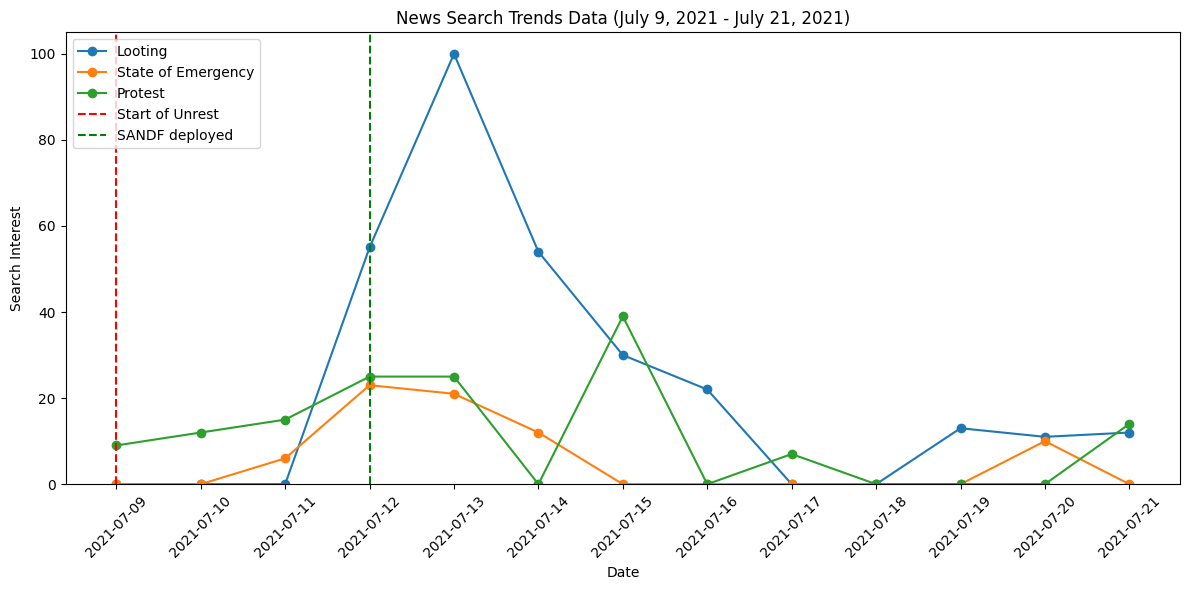

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

# Create a string with the CSV data
csv_data = """Day,Looting_news,State of emergency_news,Protest_news
2021-07-09,0,0,9
2021-07-10,0,0,12
2021-07-11,0,6,15
2021-07-12,55,23,25
2021-07-13,100,21,25
2021-07-14,54,12,0
2021-07-15,30,0,39
2021-07-16,22,0,0
2021-07-17,0,0,7
2021-07-18,0,0,0
2021-07-19,13,0,0
2021-07-20,11,10,0
2021-07-21,12,0,14
"""



# Create a DataFrame from the CSV data
df = pd.read_csv(StringIO(csv_data))

# Convert "Day" column to datetime
df['Day'] = pd.to_datetime(df['Day'])

# Create DataFrames for each curve
looting_news_df = pd.DataFrame({'Day': df['Day'], 'Looting News': df['Looting_news']})
state_of_emergency_news_df = pd.DataFrame({'Day': df['Day'], 'State of Emergency News': df['State of emergency_news']})
protest_news_df = pd.DataFrame({'Day': df['Day'], 'Protest News': df['Protest_news']})

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data
plt.plot(df['Day'], df['Looting_news'], label='Looting', marker='o')
plt.plot(df['Day'], df['State of emergency_news'], label='State of Emergency', marker='o')
plt.plot(df['Day'], df['Protest_news'], label='Protest', marker='o')

# Set y-axis range from 0 to the maximum value in the dataset
plt.ylim(0, df[['Looting_news', 'State of emergency_news', 'Protest_news']].max().max() + 5)

# Set x-axis ticks to match the dates
plt.xticks(df['Day'], rotation=45)


# Add vertical lines for specific dates
dates_to_highlight = ["2021-07-09", "2021-07-12"]  # Add your desired dates here
title_of_dates = ["Start of Unrest", "SANDF deployed"]
colors = ["red", "green"]

for date_to_highlight, color, title in zip(dates_to_highlight, colors, title_of_dates):
    ax.axvline(pd.to_datetime(date_to_highlight), color=color, linestyle='--', label=title)

# Merge both legends into a single legend
legend = ax.legend(loc='upper left')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Search Interest')
plt.title('News Search Trends Data (July 9, 2021 - July 21, 2021)')

# Show the plot
plt.tight_layout()
plt.show()


<a id="section-four"></a>
# **4. Pattern of Interest Comparisons**


<a id="section-four-a"></a>
## Comparison of Number of Tweets and GDELT Articles per Day

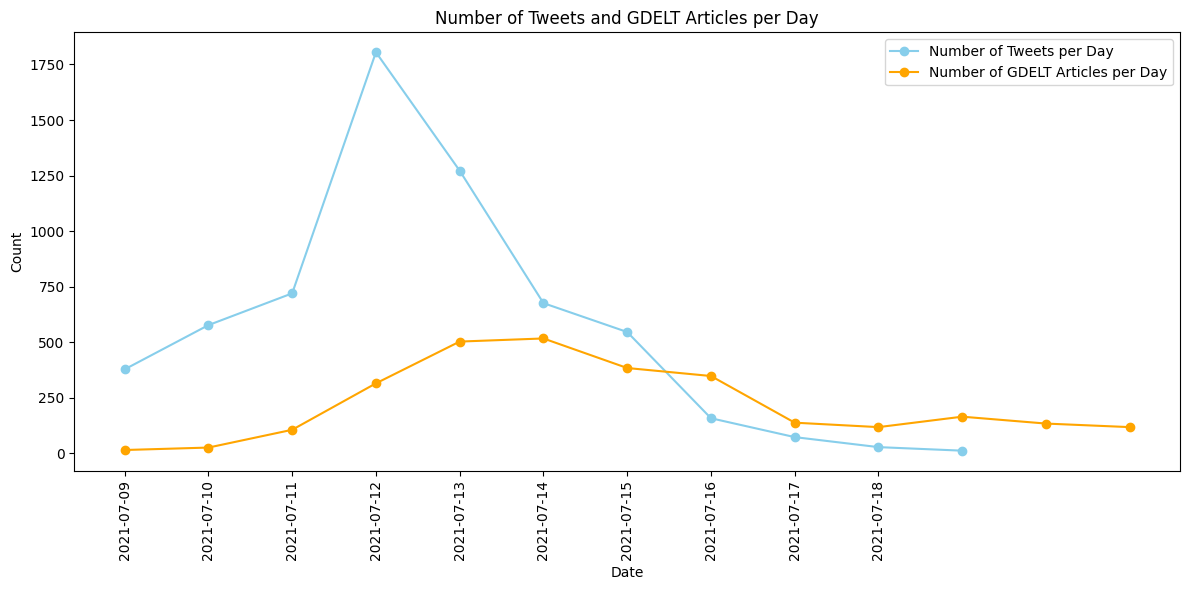

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# Assuming unrest_tweets2 is your DataFrame with the 'date' column (format from (1))

# Load the dataset from (2)
file_path = "/kaggle/input/south-africa-gdelt-riots-2021/Query_roits_2021_test6_allColumns.csv"
df = pd.read_csv(file_path)

# Group the data by SQLDATE and count the number of data points for each date
date_counts = df['SQLDATE'].value_counts().sort_index()

# Convert SQLDATE to the same datetime format as in (1)
date_counts.index = pd.to_datetime(date_counts.index, format='%Y%m%d')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the first dataset (from (1))
ax.plot(tweets_per_day.index, tweets_per_day.values, marker='o', label='Number of Tweets per Day', color='skyblue')

# Plot the second dataset (converted from SQLDATE)
ax.plot(date_counts.index, date_counts.values, marker='o', label='Number of GDELT Articles per Day', color='orange')

# Set the x-axis format to display only the date
date_formatter = DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(date_formatter)

# Set the dates starting from the beginning of the event:
specific_dates = [pd.Timestamp('2021-07-09')]
date_range = pd.date_range(start='2021-07-10', end='2021-07-18', freq='D')
all_dates = specific_dates + date_range.tolist()

ax.set_xticks(all_dates)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Count')
ax.set_title('Number of Tweets and GDELT Articles per Day')

# Add a legend
ax.legend()

plt.tight_layout()
plt.show()

Weekend Days:
[[Timestamp('2021-07-10 00:00:00'), Timestamp('2021-07-12 00:00:00')], [Timestamp('2021-07-17 00:00:00'), Timestamp('2021-07-19 00:00:00')]]


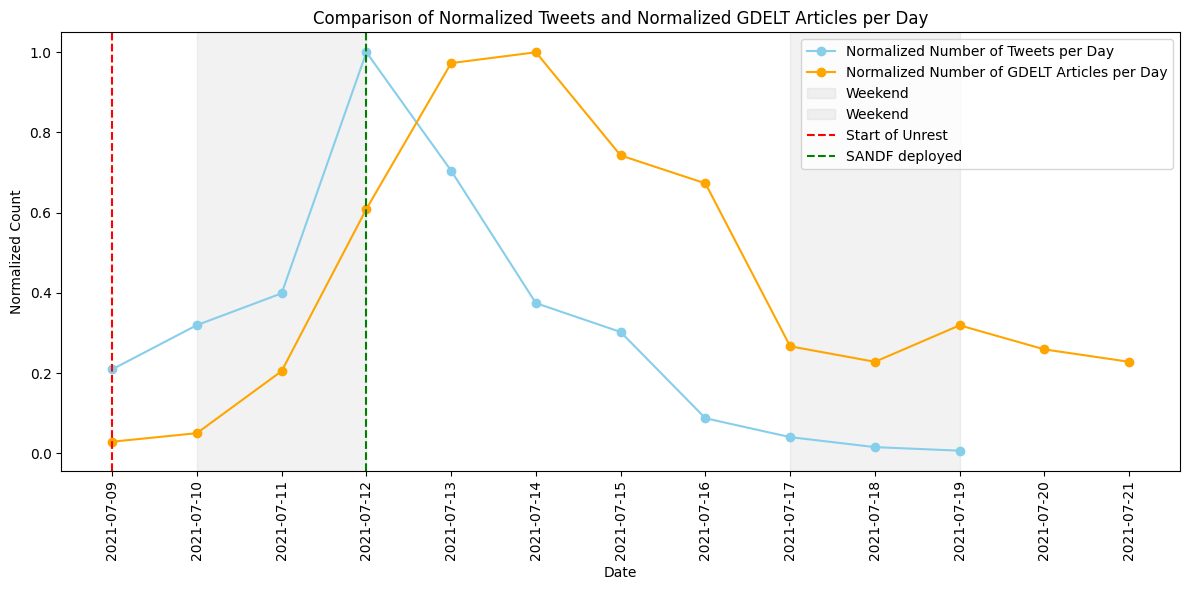

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# Assuming unrest_tweets2 is your DataFrame with the 'date' column (format from (1))

# Load the dataset from (2)
file_path = "/kaggle/input/south-africa-gdelt-riots-2021/Query_roits_2021_test6_allColumns.csv"
df = pd.read_csv(file_path)

# Group the data by SQLDATE and count the number of data points for each date
date_counts = df['SQLDATE'].value_counts().sort_index()

# Convert SQLDATE to the same datetime format as in (1)
date_counts.index = pd.to_datetime(date_counts.index, format='%Y%m%d')

# Normalize the first dataset (from (1)) to the range [0, 1]
max_value_tweets = tweets_per_day.max()
normalized_tweets = tweets_per_day / max_value_tweets

# Normalize the second dataset (converted from SQLDATE) to the range [0, 1]
max_value_articles = date_counts.max()
normalized_date_counts = date_counts / max_value_articles

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the first dataset (normalized from (1)) on the left y-axis
ax.plot(tweets_per_day.index, normalized_tweets.values, marker='o', label='Normalized Number of Tweets per Day', color='skyblue')

# Plot the second dataset (normalized) on the same y-axis
ax.plot(date_counts.index, normalized_date_counts.values, marker='o', label='Normalized Number of GDELT Articles per Day', color='orange')

# Ensure that all dates are displayed on the x-axis
date_range = pd.date_range(start='2021-07-09', end='2021-07-21', freq='D')
ax.set_xticks(date_range)

from datetime import datetime, timedelta

# Initialize an empty list to store weekend dates
weekend_dates = []

# Iterate through all dates and check if they are weekends
for i in range(len(date_range)):
    date = date_range[i]
    if i == 0 and date.dayofweek == 6:
        weekend_dates.append([date,date + timedelta(days=1)])
    elif date.dayofweek == 5:
        weekend_dates.append([date,date + timedelta(days=1)])
    elif date.dayofweek == 6:
        weekend_dates[-1][1]= date + timedelta(days=1)
    

# Print the list of weekend dates
print("Weekend Days:")
print(weekend_dates)

for weekend in weekend_dates:
    # Add shaded region for the period between '2020-11-03' and '2020-11-07'
    ax.axvspan(weekend[0], weekend[1], color='gray', alpha=0.1, label='Weekend')

# Rotate the x-axis labels for better visibility
ax.tick_params(axis='x', rotation=90)

# Add vertical lines for specific dates
dates_to_highlight = ["2021-07-09", "2021-07-12"]  # Add your desired dates here
title_of_dates = ["Start of Unrest", "SANDF deployed"]
colors = ["red", "green"]

for date_to_highlight, color, title in zip(dates_to_highlight, colors, title_of_dates):
    ax.axvline(pd.to_datetime(date_to_highlight), color=color, linestyle='--', label=title)


# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Normalized Count')
ax.set_title('Comparison of Normalized Tweets and Normalized GDELT Articles per Day')

# Add a legend for both datasets
ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

**Using this edit for poster:**

In [26]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from matplotlib.dates import DateFormatter

# # Assuming unrest_tweets2 is your DataFrame with the 'date' column (format from (1))

# # Load the dataset from (2)
# file_path = "/kaggle/input/south-africa-gdelt-riots-2021/Query_roits_2021_test6_allColumns.csv"
# df = pd.read_csv(file_path)

# # Group the data by SQLDATE and count the number of data points for each date
# date_counts = df['SQLDATE'].value_counts().sort_index()

# # Convert SQLDATE to the same datetime format as in (1)
# date_counts.index = pd.to_datetime(date_counts.index, format='%Y%m%d')

# # Normalize the first dataset (from (1)) to the range [0, 1]
# max_value_tweets = tweets_per_day.max()
# normalized_tweets = tweets_per_day / max_value_tweets

# # Normalize the second dataset (converted from SQLDATE) to the range [0, 1]
# max_value_articles = date_counts.max()
# normalized_date_counts = date_counts / max_value_articles

# # Create a figure and axis
# fig, ax = plt.subplots(figsize=(12, 6))

# # Plot the first dataset (normalized from (1)) on the left y-axis
# ax.plot(tweets_per_day.index, normalized_tweets.values, marker='o', label='Normalized Number of Tweets per Day', color='skyblue')

# # Plot the second dataset (normalized) on the same y-axis
# #ax.plot(date_counts.index, normalized_date_counts.values, marker='o', label='Normalized Number of GDELT Articles per Day', color='orange')

# # Ensure that all dates are displayed on the x-axis
# date_range = pd.date_range(start='2021-07-09', end='2021-07-21', freq='D')
# ax.set_xticks(date_range)

# from datetime import datetime, timedelta

# # Initialize an empty list to store weekend dates
# weekend_dates = []

# # Iterate through all dates and check if they are weekends
# for i in range(len(date_range)):
#     date = date_range[i]
#     if i == 0 and date.dayofweek == 6:
#         weekend_dates.append([date, date + timedelta(days=1)])
#     elif date.dayofweek == 5:
#         weekend_dates.append([date, date + timedelta(days=1)])
#     elif date.dayofweek == 6:
#         weekend_dates[-1][1] = date + timedelta(days=1)

# # Print the list of weekend dates
# print("Weekend Days:")
# print(weekend_dates)

# for weekend in weekend_dates:
#     # Add shaded region for the period between '2020-11-03' and '2020-11-07'
#     ax.axvspan(weekend[0], weekend[1], color='gray', alpha=0.1, label='Weekend')

# # Increase font size for tick labels
# ax.tick_params(axis='x', rotation=90, labelsize=12)
# ax.tick_params(axis='y', labelsize=12)

# # Add vertical lines for specific dates
# dates_to_highlight = ["2021-07-09", "2021-07-12"]  # Add your desired dates here
# title_of_dates = ["Start of Unrest", "SANDF deployed"]
# colors = ["red", "green"]

# for date_to_highlight, color, title in zip(dates_to_highlight, colors, title_of_dates):
#     ax.axvline(pd.to_datetime(date_to_highlight), color=color, linestyle='--', label=title)

# # Set labels and title
# ax.set_xlabel('Date',fontsize='16')
# ax.set_ylabel('Normalized Count',fontsize='16')
# ax.set_title('Comparison of Normalized Tweets and Normalized GDELT Articles per Day',fontsize='16')

# # Create a legend, excluding the second "weekend" entry
# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles[:2] + handles[3:], labels[:2] + labels[3:], loc='upper right')

# plt.tight_layout()
# plt.show()


<a id="section-four-b"></a>
# **Comparison of Normalized Tweets and Normalized Google Trends Web Search Data**

/tmp/ipykernel_20/2945435247.py:37: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  unrest_tweets2['date'] = pd.to_datetime(unrest_tweets2["Tweet Created At"])  # Convert the 'date' column to datetime


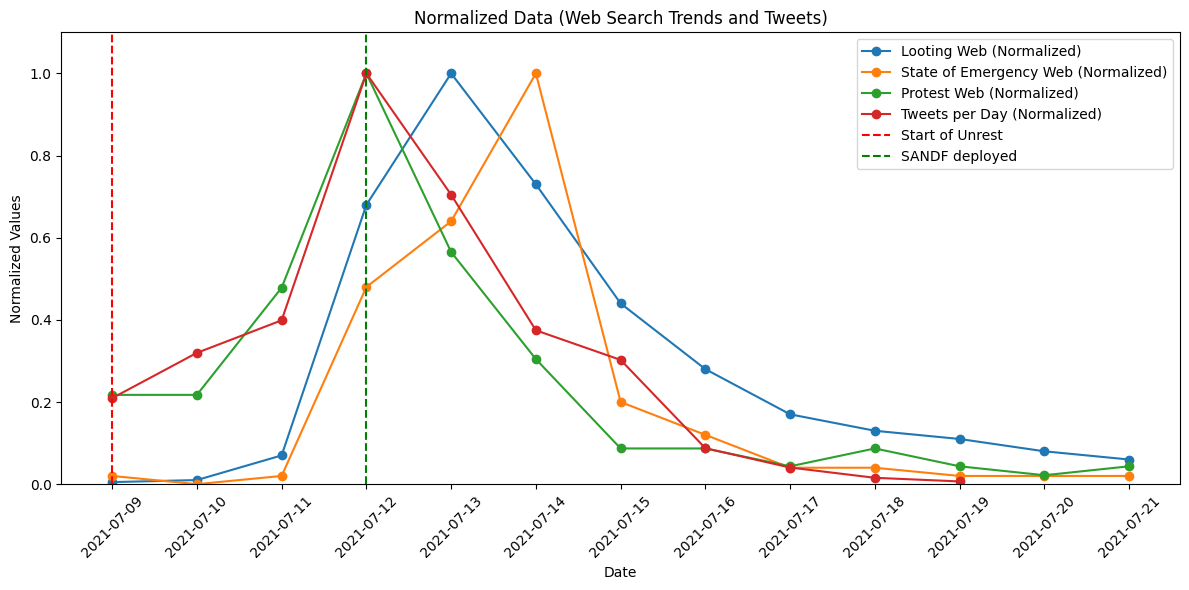

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

# Create a string with the CSV data and manually replace "<1" with "0.5"
csv_data = """Day,Looting_web,State of emergency_web,Protest_web
2021-07-09,0.5,0.5,5
2021-07-10,1,0,5
2021-07-11,7,0.5,11
2021-07-12,68,12,23
2021-07-13,100,16,13
2021-07-14,73,25,7
2021-07-15,44,5,2
2021-07-16,28,3,2
2021-07-17,17,1,1
2021-07-18,13,1,2
2021-07-19,11,0.5,1
2021-07-20,8,0.5,0.5
2021-07-21,6,0.5,1"""

# Create a DataFrame from the CSV data
df = pd.read_csv(StringIO(csv_data))

# Convert "Day" column to datetime
df['Day'] = pd.to_datetime(df['Day'])

# Normalize all dataframes to their respective max values
df['Looting_web'] = df['Looting_web'] / df['Looting_web'].max()
df['State of emergency_web'] = df['State of emergency_web'] / df['State of emergency_web'].max()
df['Protest_web'] = df['Protest_web'] / df['Protest_web'].max()

looting_web_df = pd.DataFrame({'Day': df['Day'], 'Looting Web (Normalized)': df['Looting_web']})
state_of_emergency_web_df = pd.DataFrame({'Day': df['Day'], 'State of Emergency Web (Normalized)': df['State of emergency_web']})
protest_web_df = pd.DataFrame({'Day': df['Day'], 'Protest Web (Normalized)': df['Protest_web']})

# Assuming earthquake_tweets is your DataFrame with the 'date' column
unrest_tweets2['date'] = pd.to_datetime(unrest_tweets2["Tweet Created At"])  # Convert the 'date' column to datetime

# Resample the data by day and count the number of tweets
tweets_per_day = unrest_tweets2.resample('D', on='date').size()

# Normalize the tweets_per_day data to its max value
tweets_per_day_normalized = tweets_per_day / tweets_per_day.max()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the normalized data
plt.plot(df['Day'], df['Looting_web'], label='Looting Web (Normalized)', marker='o')
plt.plot(df['Day'], df['State of emergency_web'], label='State of Emergency Web (Normalized)', marker='o')
plt.plot(df['Day'], df['Protest_web'], label='Protest Web (Normalized)', marker='o')
plt.plot(tweets_per_day_normalized.index, tweets_per_day_normalized.values, label='Tweets per Day (Normalized)', marker='o')

# Set y-axis range from 0 to 1 (normalized range)
plt.ylim(0, 1.1)

# Set x-axis ticks to match the dates
plt.xticks(df['Day'], rotation=45)

# Add vertical lines for specific dates
dates_to_highlight = ["2021-07-09", "2021-07-12"]  # Add your desired dates here
title_of_dates = ["Start of Unrest", "SANDF deployed"]
colors = ["red", "green"]

for date_to_highlight, color, title in zip(dates_to_highlight, colors, title_of_dates):
    ax.axvline(pd.to_datetime(date_to_highlight), color=color, linestyle='--', label=title)

# Merge all legends into a single legend
legend = ax.legend(loc='upper right')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Normalized Values')
plt.title('Normalized Data (Web Search Trends and Tweets)')

# Show the plot
plt.tight_layout()
plt.show()


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import ipywidgets as widgets
from ipywidgets import interact

# ... (Previous code to load and preprocess data)
# Create a string with the CSV data and manually replace "<1" with "0.5"
csv_data = """Day,Looting_web,State of emergency_web,Protest_web
2021-07-09,0.5,0.5,5
2021-07-10,1,0,5
2021-07-11,7,0.5,11
2021-07-12,68,12,23
2021-07-13,100,16,13
2021-07-14,73,25,7
2021-07-15,44,5,2
2021-07-16,28,3,2
2021-07-17,17,1,1
2021-07-18,13,1,2
2021-07-19,11,0.5,1
2021-07-20,8,0.5,0.5
2021-07-21,6,0.5,1"""

# Create a DataFrame from the CSV data
df = pd.read_csv(StringIO(csv_data))

# Convert "Day" column to datetime
df['Day'] = pd.to_datetime(df['Day'])

# Normalize all dataframes to their respective max values
df['Looting_web'] = df['Looting_web'] / df['Looting_web'].max()
df['State of emergency_web'] = df['State of emergency_web'] / df['State of emergency_web'].max()
df['Protest_web'] = df['Protest_web'] / df['Protest_web'].max()

looting_web_df = pd.DataFrame({'Day': df['Day'], 'Looting Web (Normalized)': df['Looting_web']})
state_of_emergency_web_df = pd.DataFrame({'Day': df['Day'], 'State of Emergency Web (Normalized)': df['State of emergency_web']})
protest_web_df = pd.DataFrame({'Day': df['Day'], 'Protest Web (Normalized)': df['Protest_web']})

# Create a function to update the plot based on the selected datasets
def update_plot(show_tweets, show_looting, show_state, show_protest):
    fig, ax = plt.subplots(figsize=(12, 6))

    if show_tweets:
        ax.plot(tweets_per_day.index, tweets_per_day_normalized, marker='o', label='Tweets per Day (Normalized)', color='skyblue')
    if show_looting:
        ax.plot(df['Day'], df['Looting_web'], marker='o', label='Looting Web (Normalized)', color='orange')
    if show_state:
        ax.plot(df['Day'], df['State of emergency_web'], marker='o', label='State of Emergency Web (Normalized)', color='green')
    if show_protest:
        ax.plot(df['Day'], df['Protest_web'], marker='o', label='Protest Web (Normalized)', color='red')

    # Add vertical lines for specific dates
    dates_to_highlight = ["2021-07-09", "2021-07-12"]  # Add your desired dates here
    title_of_dates = ["Start of Unrest", "SANDF deployed"]
    colors = ["purple", "yellow"]

    for date_to_highlight, color, title in zip(dates_to_highlight, colors, title_of_dates):
        ax.axvline(pd.to_datetime(date_to_highlight), color=color, linestyle='--', label=title)

    # Merge all legends into a single legend
    legend = ax.legend(loc='upper left')

    # Ensure that all dates are displayed on the x-axis
    date_range = pd.date_range(start='2021-07-09', end='2021-07-21', freq='D')
    ax.set_xticks(date_range)

    # Rotate the x-axis labels for better visibility
    ax.tick_params(axis='x', rotation=45)

    # Set labels and title
    ax.set_xlabel('Date')
    ax.set_ylabel('Normalized Values')
    ax.set_title('Normalized Data (Web Search Trends and Tweets')

    plt.tight_layout()
    plt.show()

# Create checkboxes to select the datasets
show_tweets_checkbox = widgets.Checkbox(
    value=False,
    description='Show Tweets per day',
    disabled=False
)

show_looting_checkbox = widgets.Checkbox(
    value=False,
    description='Show Looting Web Signature',
    disabled=False
)

show_state_checkbox = widgets.Checkbox(
    value=False,
    description='Show State of Emergency Web Signature',
    disabled=False
)

show_protest_checkbox = widgets.Checkbox(
    value=False,
    description='Show "Protest" Web Signature',
    disabled=False
)

# Create an interactive plot
interact(update_plot, show_tweets=show_tweets_checkbox, show_looting=show_looting_checkbox,
         show_state=show_state_checkbox, show_protest=show_protest_checkbox)


interactive(children=(Checkbox(value=False, description='Show Tweets per day'), Checkbox(value=False, descript…

<function __main__.update_plot(show_tweets, show_looting, show_state, show_protest)>

<a id="section-four-c"></a>
## Comparison of Normalized GDELT Articles and Normalized Google Trends News Search Data

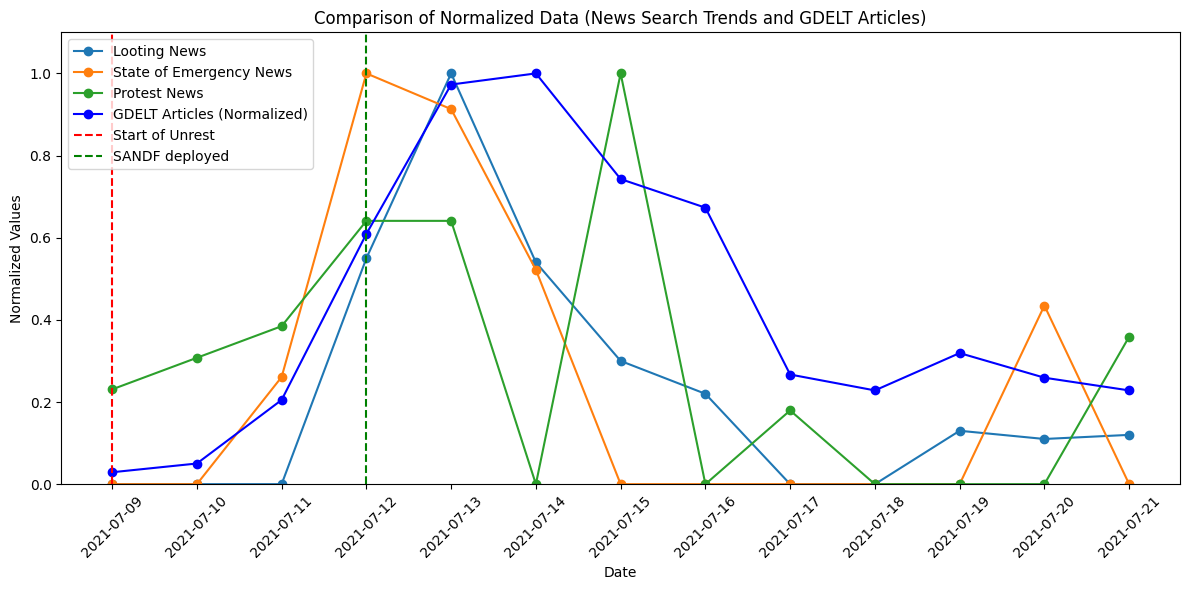

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

# Create a string with the CSV data for the news search trends
csv_data = """Day,Looting_news,State of emergency_news,Protest_news
2021-07-09,0,0,9
2021-07-10,0,0,12
2021-07-11,0,6,15
2021-07-12,55,23,25
2021-07-13,100,21,25
2021-07-14,54,12,0
2021-07-15,30,0,39
2021-07-16,22,0,0
2021-07-17,0,0,7
2021-07-18,0,0,0
2021-07-19,13,0,0
2021-07-20,11,10,0
2021-07-21,12,0,14
"""

# Create a DataFrame from the CSV data
df = pd.read_csv(StringIO(csv_data))

# Convert "Day" column to datetime
df['Day'] = pd.to_datetime(df['Day'])

# Create DataFrames for each curve
looting_news_df = pd.DataFrame({'Day': df['Day'], 'Looting News': df['Looting_news']})
state_of_emergency_news_df = pd.DataFrame({'Day': df['Day'], 'State of Emergency News': df['State of emergency_news']})
protest_news_df = pd.DataFrame({'Day': df['Day'], 'Protest News': df['Protest_news']})

# Normalize each DataFrame to its own max value
looting_news_df['Looting News'] = looting_news_df['Looting News'] / looting_news_df['Looting News'].max()
state_of_emergency_news_df['State of Emergency News'] = state_of_emergency_news_df['State of Emergency News'] / state_of_emergency_news_df['State of Emergency News'].max()
protest_news_df['Protest News'] = protest_news_df['Protest News'] / protest_news_df['Protest News'].max()

# Load the GDELT dataset
file_path = "/kaggle/input/south-africa-gdelt-riots-2021/Query_roits_2021_test6_allColumns.csv"
df_gdelt = pd.read_csv(file_path)

# Group the data by SQLDATE and count the number of data points for each date
date_counts = df_gdelt['SQLDATE'].value_counts().sort_index()

# Convert SQLDATE to the same datetime format as in the news search trends data
date_counts.index = pd.to_datetime(date_counts.index, format='%Y%m%d')

# Normalize the GDELT data with its own max value
date_counts_normalized = date_counts / date_counts.max()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the normalized data
plt.plot(df['Day'], looting_news_df['Looting News'], label='Looting News', marker='o')
plt.plot(df['Day'], state_of_emergency_news_df['State of Emergency News'], label='State of Emergency News', marker='o')
plt.plot(df['Day'], protest_news_df['Protest News'], label='Protest News', marker='o')
plt.plot(date_counts_normalized.index, date_counts_normalized.values, label='GDELT Articles (Normalized)', marker='o', color='blue')

# Set y-axis range from 0 to 1 (normalized range)
plt.ylim(0, 1.1)

# Set x-axis ticks to match the dates
plt.xticks(df['Day'], rotation=45)

# Add vertical lines for specific dates
dates_to_highlight = ["2021-07-09", "2021-07-12"]  # Add your desired dates here
title_of_dates = ["Start of Unrest", "SANDF deployed"]
colors = ["red", "green"]

for date_to_highlight, color, title in zip(dates_to_highlight, colors, title_of_dates):
    ax.axvline(pd.to_datetime(date_to_highlight), color=color, linestyle='--', label=title)

# Merge all legends into a single legend
legend = ax.legend(loc='upper left')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Normalized Values')
plt.title('Comparison of Normalized Data (News Search Trends and GDELT Articles)')

# Show the plot
plt.tight_layout()
plt.show()


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
import ipywidgets as widgets
from ipywidgets import interact

# Create a string with the CSV data for the news search trends
csv_data = """Day,Looting_news,State of emergency_news,Protest_news
2021-07-09,0,0,9
2021-07-10,0,0,12
2021-07-11,0,6,15
2021-07-12,55,23,25
2021-07-13,100,21,25
2021-07-14,54,12,0
2021-07-15,30,0,39
2021-07-16,22,0,0
2021-07-17,0,0,7
2021-07-18,0,0,0
2021-07-19,13,0,0
2021-07-20,11,10,0
2021-07-21,12,0,14
"""

# Create a DataFrame from the CSV data
df = pd.read_csv(StringIO(csv_data))

# Convert "Day" column to datetime
df['Day'] = pd.to_datetime(df['Day'])

# Create DataFrames for each curve
looting_news_df = pd.DataFrame({'Day': df['Day'], 'Looting News': df['Looting_news']})
state_of_emergency_news_df = pd.DataFrame({'Day': df['Day'], 'State of Emergency News': df['State of emergency_news']})
protest_news_df = pd.DataFrame({'Day': df['Day'], 'Protest News': df['Protest_news']})

# Normalize each DataFrame to its own max value
looting_news_df['Looting News'] = looting_news_df['Looting News'] / looting_news_df['Looting News'].max()
state_of_emergency_news_df['State of Emergency News'] = state_of_emergency_news_df['State of Emergency News'] / state_of_emergency_news_df['State of Emergency News'].max()
protest_news_df['Protest News'] = protest_news_df['Protest News'] / protest_news_df['Protest News'].max()

# Load the GDELT dataset
file_path = "/kaggle/input/south-africa-gdelt-riots-2021/Query_roits_2021_test6_allColumns.csv"
df_gdelt = pd.read_csv(file_path)

# Group the data by SQLDATE and count the number of data points for each date
date_counts = df_gdelt['SQLDATE'].value_counts().sort_index()

# Convert SQLDATE to the same datetime format as in the news search trends data
date_counts.index = pd.to_datetime(date_counts.index, format='%Y%m%d')

# Normalize the GDELT data with its own max value
date_counts_normalized = date_counts / date_counts.max()

# Create a function to update the plot based on the selected dataframes
def update_plot(show_looting, show_state, show_protest, show_gdelt):
    fig, ax = plt.subplots(figsize=(12, 6))

    if show_looting:
        ax.plot(df['Day'], looting_news_df['Looting News'], marker='o', label='Looting News (Normalized)', color='orange')
    if show_state:
        ax.plot(df['Day'], state_of_emergency_news_df['State of Emergency News'], marker='o', label='State of Emergency News (Normalized)', color='green')
    if show_protest:
        ax.plot(df['Day'], protest_news_df['Protest News'], marker='o', label='Protest News (Normalized)')
    if show_gdelt:
        ax.plot(date_counts_normalized.index, date_counts_normalized.values, marker='o', label='GDELT Articles (Normalized)', color='blue')

    # Set y-axis range from 0 to 1 (normalized range)
    plt.ylim(0, 1.1)

    # Set x-axis ticks to match the dates
    plt.xticks(df['Day'], rotation=45)

    # Add vertical lines for specific dates
    dates_to_highlight = ["2021-07-09", "2021-07-12"]  # Add your desired dates here
    title_of_dates = ["Start of Unrest", "SANDF deployed"]
    colors = ["red", "green"]

    for date_to_highlight, color, title in zip(dates_to_highlight, colors, title_of_dates):
        ax.axvline(pd.to_datetime(date_to_highlight), color=color, linestyle='--', label=title)

    # Merge all legends into a single legend
    legend = ax.legend(loc='upper left')

    # Add labels and title
    plt.xlabel('Date')
    plt.ylabel('Normalized Values')
    plt.title('Comparison of Normalized Data (News Search Trends and GDELT Articles)')

    plt.tight_layout()
    plt.show()

# Create checkboxes to select the dataframes
show_looting_checkbox = widgets.Checkbox(
    value=False,
    description='Show Looting News',
    disabled=False
)

show_state_checkbox = widgets.Checkbox(
    value=False,
    description='Show State of Emergency News',
    disabled=False
)

show_protest_checkbox = widgets.Checkbox(
    value=False,
    description='Show Protest News',
    disabled=False
)

show_gdelt_checkbox = widgets.Checkbox(
    value=False,
    description='Show GDELT Articles',
    disabled=False
)

# Create an interactive plot
interact(update_plot, show_looting=show_looting_checkbox, show_state=show_state_checkbox, show_protest=show_protest_checkbox, show_gdelt=show_gdelt_checkbox)


interactive(children=(Checkbox(value=False, description='Show Looting News'), Checkbox(value=False, descriptio…

<function __main__.update_plot(show_looting, show_state, show_protest, show_gdelt)>

<a id="section-five"></a>
## **Mathematical Framework**



<a id="section-five-a"></a>
# **Seasonal Decomposition**

## Components of decompsition:

**1. Trend Component:**

The trend component represents the underlying **long-term behavior** or trend in the data. In this context, it represents whether data is showing an general trend of increasing, decreasing, or remaining relatively stable over time.
By examining the trend component, you can identify significant shifts or changes in the overall trend, such as periods of rapid growth or decline.

**2. Seasonal Component:**

The seasonal component captures **repeating patterns** or seasonality in the data. Seasonality refers to regular fluctuations in the data that occur at fixed intervals, such as daily, weekly, monthly, or yearly patterns.
By analyzing the seasonal component, you can identify and understand the seasonal patterns in the number of GDELT articles. For example, you can determine if there are specific times of the year or week when article counts tend to be higher or lower.

**3. Residual Component:**

The residual component represents the **unexplained or random variation in the data** that remains after removing the trend and seasonal components. It includes noise and irregular fluctuations.
Examining the residual component can help you identify unusual or unexpected events that are not explained by the trend or seasonality. Large residual values may indicate outliers or anomalies in the data.

### Additive vs. Multiplicative Decomposition:

- **Additive Decomposition:** Divides the data into three components - trend, seasonal, and residual. It's suitable when the seasonal effect remains constant over time.

- **Multiplicative Decomposition:** Also separates data into trend, seasonal, and residual components, but in this method, they are multiplied together. Use this when the seasonal effect scales with the data's level.

### "Period" Parameter:

The "period" parameter specifies the number of data points in one complete season. For daily data with annual seasonality, set "period" to 365.


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from statsmodels.tsa.seasonal import seasonal_decompose
import ipywidgets as widgets
from ipywidgets import interact

# Load the GDELT dataset
file_path = "/kaggle/input/south-africa-gdelt-riots-2021/Query_roits_2021_test6_allColumns.csv"
df_gdelt = pd.read_csv(file_path)

# Group the data by SQLDATE and count the number of data points for each date
date_counts = df_gdelt['SQLDATE'].value_counts().sort_index()

# Convert SQLDATE to the same datetime format as in the news search trends data
date_counts.index = pd.to_datetime(date_counts.index, format='%Y%m%d')

# Create a function to decompose the time series with interactive seasonality selection
def decompose_and_plot(seasonality_frequency, decomposition_method):
    # Decompose the time series with the chosen seasonality frequency and method
    if decomposition_method == 'Additive':
        decomposition = seasonal_decompose(date_counts, model='additive', period=seasonality_frequency)
    else:
        decomposition = seasonal_decompose(date_counts, model='multiplicative', period=seasonality_frequency)
    
    # Plot the original data
    plt.figure(figsize=(12, 6))
    plt.plot(date_counts.index, date_counts.values, marker='o', label='Number of GDELT Articles per Day', color='orange')

    # Plot the trend component
    plt.plot(decomposition.trend.index, decomposition.trend.values, label='Trend', linestyle='--', color='blue')

    # Plot the seasonal component
    plt.plot(decomposition.seasonal.index, decomposition.seasonal.values, label='Seasonal', linestyle='--', color='green')

    # Plot the residual component
    plt.plot(decomposition.resid.index, decomposition.resid.values, label='Residual', linestyle='--', color='red')

    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.title(f'Decomposition of GDELT Articles Time Series (Seasonality Frequency: {seasonality_frequency}, Method: {decomposition_method})')
    plt.legend()
    plt.show()

# Create a slider widget for choosing seasonality frequency
seasonality_frequency_slider = widgets.IntSlider(
    value=365,  # Default value (assuming annual seasonality)
    min=1,
    max=365,  # Adjust the maximum based on your data's seasonality
    step=1,
    description='Seasonality Frequency:',
    continuous_update=False
)

# Create a dropdown widget for choosing decomposition method
decomposition_method_dropdown = widgets.Dropdown(
    options=['Additive', 'Multiplicative'],
    value='Additive',
    description='Decomposition Method:',
    disabled=False,
)

# Create an interactive plot
interact(decompose_and_plot, seasonality_frequency=seasonality_frequency_slider, decomposition_method=decomposition_method_dropdown)


interactive(children=(IntSlider(value=365, continuous_update=False, description='Seasonality Frequency:', max=…

<function __main__.decompose_and_plot(seasonality_frequency, decomposition_method)>

## Cross-Correlation between the News Media and Social Media. 

Cross-correlation is a technique used to measure the similarity between two signals or data sets as a function of the time lag between them.

### What is Cross-Correlation?

- Cross-correlation quantifies how well one signal matches another when one is shifted by a certain time lag.
- It is used to identify patterns, periodicity, or relationships between two signals, even if they are not necessarily linearly related.
- Cross-correlation can be used to find time delays, detect repeating patterns, or compare signals in various scientific fields.

### Formula for Discrete Data

The formula for cross-correlation between two discrete data sets X and Y with n data points each is:

R(k) = ∑(X(t)⋅Y(t−k))


Here, `R(k)` represents the cross-correlation at time lag `k`, `X(t)` and `Y(t)` are discrete data points, and `∑` denotes summation over all data points.

### Comparing Delay at Different Points

- Cross-correlation allows us to compare the similarity or alignment between two signals at various time lags (`k`).
- Positive peaks in the cross-correlation function indicate that one signal follows the other with a specific time delay (`k`).
- Negative peaks suggest that one signal leads the other.
- A time lag of `k = 0` means the signals are synchronized, while other values of `k` represent time offsets or delays.

By analyzing the cross-correlation function, researchers can determine the time lag at which the two signals are most similar or divergent, providing valuable insights into their temporal dynamics and relationships.


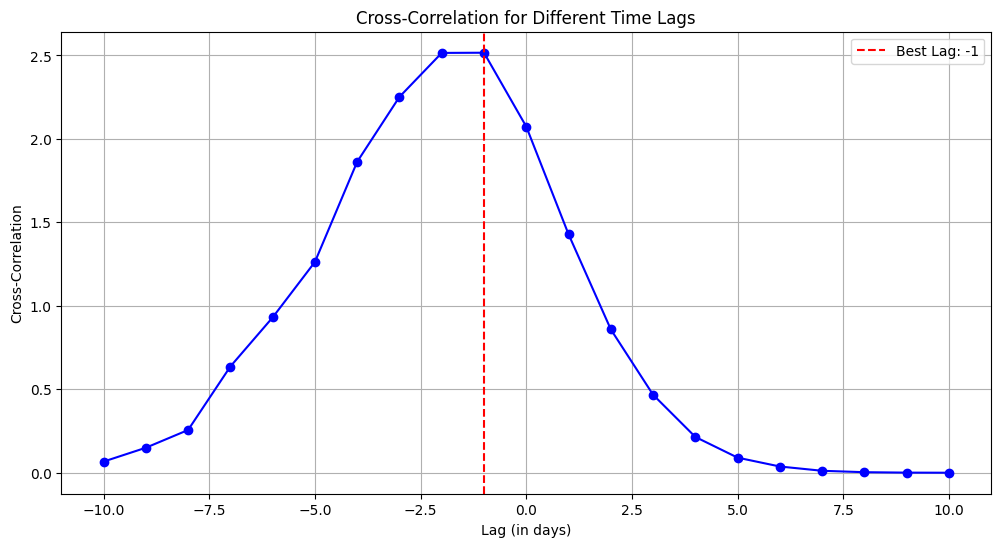

In [32]:
import pandas as pd
import numpy as np
from scipy.signal import correlate
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt

# Assuming you have loaded and normalized your datasets as described earlier
# The two datasets are normalized_tweets and normalized_date_counts

# Create a new DataFrame matching the length of normalized_tweets
normalized_date_counts_corr = pd.DataFrame({'Value': normalized_date_counts[:len(normalized_tweets)]})

# Calculate Cross-Correlation
cross_corr = correlate(normalized_tweets, normalized_date_counts_corr['Value'], mode='full', method='fft')

# Calculate Time Lags
time_lags = np.arange(-len(normalized_tweets) + 1, len(normalized_date_counts_corr))

# Find the lag at which the cross-correlation is the highest
best_lag = time_lags[np.argmax(cross_corr)]

# Calculate Euclidean Distance and specify the best Euclidean distance at each shift
euclidean_dists = []
best_euclidean_dist = float('inf')  # Initialize with a high value

for shift in range(len(normalized_tweets)):
    shifted_date_counts = np.roll(normalized_date_counts_corr['Value'], shift)
    euclidean_dist = euclidean(normalized_tweets, shifted_date_counts)
    euclidean_dists.append(euclidean_dist)
    
    if euclidean_dist < best_euclidean_dist:
        best_euclidean_dist = euclidean_dist

# Plot the cross-correlation graph
plt.figure(figsize=(12, 6))
plt.plot(time_lags, cross_corr, marker='o', linestyle='-', color='blue')
plt.xlabel('Lag (in days)')
plt.ylabel('Cross-Correlation')
plt.title('Cross-Correlation for Different Time Lags')
plt.axvline(best_lag, color='red', linestyle='--', label=f'Best Lag: {best_lag}')
plt.legend()
plt.grid(True)
plt.show()




# Similarity of Event Signature Archetypes:

## Black Lives Matter:

In [33]:
csv_file_path= '/kaggle/input/twitter-black-lives-matter-100k/100000_tweets_BlackLivesMatter_04-03-23.csv'
blm_tweets = pd.read_csv(csv_file_path, low_memory=False)

In [34]:
blm_tweets.head()

,Unnamed: 0,date,tweet_content,tweet_rendered_content,tweet_id,user_name,display_name,user_id,user_description,verified,...,tweet_reply_count,tweet_retweet_count,tweet_like_count,tweet_quote_count,tweet_language,tweet_source,rt_original_tweet_id,quoted_tweet_original_tweet_id,tweet_mentioned_users,tweet_hashtags
0,0,2023-04-03 21:05:15+00:00,SJSHSJJSH siapa yg nangis... gw.... ya Allah k...,SJSHSJJSH siapa yg nangis... gw.... ya Allah k...,1642996710464192512,nadealeine,Noémie,1278352180144033792,NaN,False,...,0,0,0,0,in,"<a href=""http://twitter.com/download/android"" ...",NaN,https://twitter.com/charts_k/status/1642948123...,NaN,NaN
1,1,2023-04-03 21:05:13+00:00,@Diiovane_ Sim,@Diiovane_ Sim,1642996701387472897,FonsecaSCI2478,Fonsecaˢᶜᶦ🇮🇩 BlackLivesMatter ✊🏿,1028444469354487808,"Casado, Pai do Igor, Juan, Antony, Laura e B...",False,...,0,0,0,0,und,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,"[User(username='Diiovane_', id=3072255134, dis...",NaN
2,2,2023-04-03 21:05:13+00:00,Someone needs to check the keepers Betway account,Someone needs to check the keepers Betway account,1642996698963144704,ArsenalBLM,BLMAlways,1293475982238785537,#BlackLivesMatter,False,...,0,0,0,0,en,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/CraigGTelfer/status/164290...,NaN,NaN
3,3,2023-04-03 21:05:11+00:00,@jisellearn Baru mau mng cel blm sempet kenala...,@jisellearn Baru mau mng cel blm sempet kenala...,1642996692281851904,plngee,GheYaa,1386013618072735744,Duta Badlooking Sejagad!,False,...,0,0,0,0,in,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,"[User(username='jisellearn', id=16426332242403...",NaN
4,4,2023-04-03 21:05:10+00:00,@REMASxKARINA betul sih wkwkw km blm bobo kah?,@REMASxKARINA betul sih wkwkw km blm bobo kah?,1642996688427298817,REMASxHKE,Akiffa,773623180862820353,you’ll find me on my tallest tiptoes spinning ...,False,...,0,0,0,0,in,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,"[User(username='REMASxKARINA', id=163376329292...",NaN


In [35]:
print('There are {} rows and {} columns in the twitter dataset'.format(blm_tweets.shape[0],blm_tweets.shape[1]))

There are 100000 rows and 25 columns in the twitter dataset


In [36]:
blm_tweets.sort_values(by='date').info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 99999 to 0
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unnamed: 0                      100000 non-null  int64  
 1   date                            100000 non-null  object 
 2   tweet_content                   100000 non-null  object 
 3   tweet_rendered_content          100000 non-null  object 
 4   tweet_id                        100000 non-null  int64  
 5   user_name                       100000 non-null  object 
 6   display_name                    99991 non-null   object 
 7   user_id                         100000 non-null  int64  
 8   user_description                87937 non-null   object 
 9   verified                        100000 non-null  bool   
 10  user_profile_created            100000 non-null  object 
 11  user_follower_count             100000 non-null  int64  
 12  user_friend_count     

In [37]:
import pandas as pd

# Assuming you have a DataFrame called 'blm_tweets' with a 'date' column
# First, make sure the 'date' column is in datetime format
blm_tweets['date'] = pd.to_datetime(blm_tweets['date'])

# Sort the DataFrame by the 'date' column
blm_tweets_sorted = blm_tweets.sort_values(by='date')

# Get the earliest date
earliest_date = blm_tweets_sorted['date'].min()

# Get the latest date
latest_date = blm_tweets_sorted['date'].max()

# Format the dates in the desired format
earliest_date_formatted = earliest_date.strftime('%Y-%m-%d')
latest_date_formatted = latest_date.strftime('%Y-%m-%d')

# Print the formatted results
print("Earliest Date:", earliest_date_formatted)
print("Latest Date:", latest_date_formatted)


Earliest Date: 2023-03-31
Latest Date: 2023-04-03


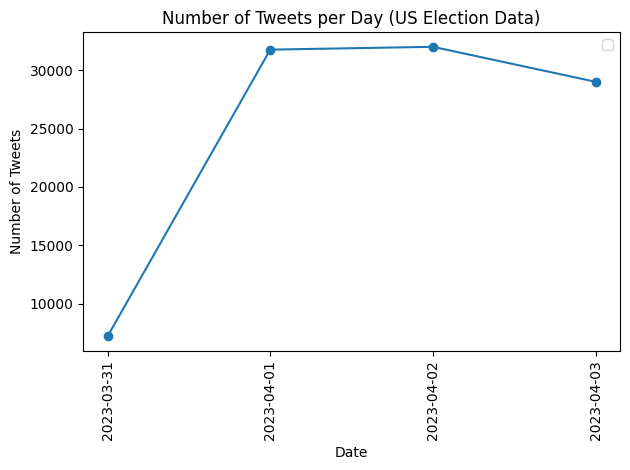

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# Assuming blm_tweets is your DataFrame with the 'date' column
blm_tweets['date'] = pd.to_datetime(blm_tweets['date'])  # Convert the 'date' column to datetime

# Resample the data by day and count the number of records (tweets)
blm_tweets_per_day = blm_tweets.resample('D', on='date').size()

# Find the date with the highest number of tweets
date_with_highest_tweets = blm_tweets_per_day.idxmax()

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the data
ax.plot(blm_tweets_per_day.index, blm_tweets_per_day.values, marker='o')

# Set the x-axis format to display only the date in '%Y-%m-%d' format
date_formatter = DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(date_formatter)

# Set the date range dynamically based on the earliest and latest dates in the data
earliest_date = blm_tweets['date'].min()
latest_date = blm_tweets['date'].max()
date_range = pd.date_range(start=earliest_date_formatted, end=latest_date_formatted, freq='D')
all_dates = date_range.tolist()

ax.set_xticks(all_dates)

ax.legend()

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Number of Tweets')
ax.set_title('Number of Tweets per Day (US Election Data)')

plt.tight_layout()
plt.show()


<a id="section-six"></a>
# **Iran Protests 2022**

On September 13, 22-year-old “Mahsa Amini” was arrested by Iran's morality police for “improperly” wearing her hijab, and according to her family and local media, severely beaten.
She died three days later while still in police custody.

In [39]:
csv_file_path= '/kaggle/input/iran-protests-2022-tweets/tweets.csv'
iran_tweets = pd.read_csv(csv_file_path, low_memory=False)

In [40]:
iran_tweets.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source
0,Auesha Sumayaa,NaN,Passionate #learner and curious observer | #Tw...,2020-01-21 05:14:40+00:00,1724.0,548,3224,False,2023-06-10 08:57:07+00:00,The spirit of democracy and freedom is alive i...,['Zahedan'],Twitter for iPhone
1,Darius Bianchi 🇨🇦 🇮🇹,NaN,"Politics, Historiography, Sociology\n#Resistin...",2020-12-01 17:02:30+00:00,2260.0,1983,11789,False,2023-06-10 08:47:34+00:00,@HappyHippieRes @SARA2001NOOR @oprman @knrepp ...,NaN,Twitter Web App
2,Gabriella Julia,NaN,#Advocate for #education and promoting inclusi...,2020-12-30 07:45:41+00:00,1192.0,374,1304,False,2023-06-10 08:47:05+00:00,The determination of the protestors in #Zaheda...,['Zahedan'],Twitter for iPhone
3,𝐈𝐫𝐚𝐧𝐢𝐚𝐧 𝐯𝐨𝐢𝐜𝐞,NaN,The struggle for freedom and democracy\nhttps:...,2017-03-12 11:10:22+00:00,3381.0,2267,30162,False,2023-06-10 08:26:14+00:00,Protests and attacks against Iran’s regime con...,"['Iran', 'IranProtests', 'IranUprising']",Twitter Web App
4,𝐈𝐫𝐚𝐧𝐢𝐚𝐧 𝐯𝐨𝐢𝐜𝐞,NaN,The struggle for freedom and democracy\nhttps:...,2017-03-12 11:10:22+00:00,3381.0,2267,30162,False,2023-06-10 08:26:02+00:00,Brave Baluchis renew Iran’s anti-regime protes...,"['Iran', 'IranProtests', 'IranUprising']",Twitter Web App


In [41]:
print('There are {} rows and {} columns in the twitter dataset'.format(iran_tweets.shape[0],iran_tweets.shape[1]))

There are 589600 rows and 12 columns in the twitter dataset


In [42]:
iran_tweets.sort_values(by='date').info()

<class 'pandas.core.frame.DataFrame'>
Index: 589600 entries, 589599 to 569987
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_name         589589 non-null  object 
 1   user_location     242783 non-null  object 
 2   user_description  452450 non-null  object 
 3   user_created      589590 non-null  object 
 4   user_followers    589590 non-null  float64
 5   user_friends      589590 non-null  object 
 6   user_favourites   589590 non-null  object 
 7   user_verified     589590 non-null  object 
 8   date              589590 non-null  object 
 9   text              589589 non-null  object 
 10  hashtags          368481 non-null  object 
 11  source            589587 non-null  object 
dtypes: float64(1), object(11)
memory usage: 58.5+ MB


In [43]:
iran_tweets.isna().sum()

user_name               11
user_location       346817
user_description    137150
user_created            10
user_followers          10
user_friends            10
user_favourites         10
user_verified           10
date                    10
text                    11
hashtags            221119
source                  13
dtype: int64

**Iran Profiling report**

In [44]:
import pandas as pd
from pandas_profiling import ProfileReport
import os
from IPython.display import display, HTML

# Define the report file name
report_filename = "/kaggle/input/iran-profile-report/iran_report.html"

# Check if the report file exists
if os.path.exists(report_filename):
    # Display the existing report by opening it in a web browser
    with open(report_filename, 'r', encoding='utf-8') as file:
        report_html = file.read()
        display(HTML(report_html))
else:
    # Generate the report and save it to the file
    profile = ProfileReport(iran_tweets, title='Iran Profiling Report', minimal=True)
    profile.to_file(report_filename)


/opt/conda/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/conda/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:
/tmp/ipykernel_20/658382414.py:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling`

Number of variables,12
Number of observations,589600
Missing cells,705181
Missing cells (%),10.0%
Total size in memory,54.0 MiB
Average record size in memory,96.0 B
Categorical,11
Numeric,1
user_name has a high cardinality: 85641 distinct values,High cardinality
user_location has a high cardinality: 18319 distinct values,High cardinality
user_description has a high cardinality: 73153 distinct values,High cardinality


In [45]:
import pandas as pd

# Assuming you have a DataFrame called 'iran_tweets' with a 'parsed_date' column

# Group the DataFrame by the 'parsed_date' column and count the rows for each date
date_counts = iran_tweets.groupby('date').size().reset_index(name='count')

# Print the date counts
print(date_counts)

                                                     date  count
0                               2022-09-23 17:58:51+00:00      1
1                               2022-09-23 17:58:55+00:00      1
2                               2022-09-23 17:58:56+00:00      1
3                               2022-09-23 17:59:01+00:00      1
4                               2022-09-23 17:59:08+00:00      3
...                                                   ...    ...
541947                          2023-06-10 09:33:45+00:00      1
541948                          2023-06-10 09:34:07+00:00      1
541949  Best partner to start a project with.\n#Gambli...      1
541950  Check out this item on OpenSea, Mehsa Amini wa...      1
541951  ['OpIran', 'MahsaAmini', 'مهسا_امینی', 'اعتصاب...      1

[541952 rows x 2 columns]


These strings are causing problems:
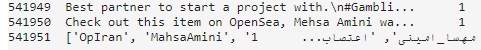

In [46]:
import pandas as pd

# Assuming you have a DataFrame called 'iran_tweets' with a 'date' column

# Convert the 'date' column to a string
iran_tweets['date'] = iran_tweets['date'].astype(str)

# Filter the rows where the 'date' column starts with '2022' or '2023'
iran_tweets_filtered = iran_tweets[iran_tweets['date'].str.startswith(('2022', '2023'))]

# Reset the index of the filtered DataFrame
iran_tweets_filtered.reset_index(drop=True, inplace=True)

# Now, iran_tweets_filtered contains only the rows where the 'date' column starts with '2022' or '2023'
# Group the DataFrame by the 'parsed_date' column and count the rows for each date
date_counts = iran_tweets_filtered.groupby('date').size().reset_index(name='count')

# Print the date counts
print(date_counts)

                             date  count
0       2022-09-23 17:58:51+00:00      1
1       2022-09-23 17:58:55+00:00      1
2       2022-09-23 17:58:56+00:00      1
3       2022-09-23 17:59:01+00:00      1
4       2022-09-23 17:59:08+00:00      3
...                           ...    ...
541944  2023-06-10 09:27:53+00:00      1
541945  2023-06-10 09:29:27+00:00      1
541946  2023-06-10 09:33:03+00:00      1
541947  2023-06-10 09:33:45+00:00      1
541948  2023-06-10 09:34:07+00:00      1

[541949 rows x 2 columns]


In [47]:
import pandas as pd

# Assuming you have a DataFrame called 'iran_tweets_filtered' with a 'date' column

# Convert the 'date' column to datetime format
iran_tweets_filtered['date'] = pd.to_datetime(iran_tweets_filtered['date'])

# Extract the date component from the 'date' column
iran_tweets_filtered['date'] = iran_tweets_filtered['date'].dt.date

# Group the DataFrame by the 'date' column and count the dates for each unique date
date_counts = iran_tweets_filtered.groupby('date').size().reset_index(name='count')

# Print the date counts
print("Count per date:")
print(date_counts)


/tmp/ipykernel_20/2903596063.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iran_tweets_filtered['date'] = pd.to_datetime(iran_tweets_filtered['date'])
/tmp/ipykernel_20/2903596063.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iran_tweets_filtered['date'] = iran_tweets_filtered['date'].dt.date


Count per date:
           date  count
0    2022-09-23   1999
1    2022-09-24   6145
2    2022-09-26     92
3    2022-09-27   1379
4    2022-09-28   1010
..          ...    ...
255  2023-06-06     92
256  2023-06-07    182
257  2023-06-08    343
258  2023-06-09    172
259  2023-06-10     87

[260 rows x 2 columns]


In [48]:
# Get the earliest date
earliest_date = date_counts['date'].min()

# Get the latest date
latest_date = date_counts['date'].max()

# Print the results
print("Earliest Date:", earliest_date)
print("Latest Date:", latest_date)


Earliest Date: 2022-09-23
Latest Date: 2023-06-10


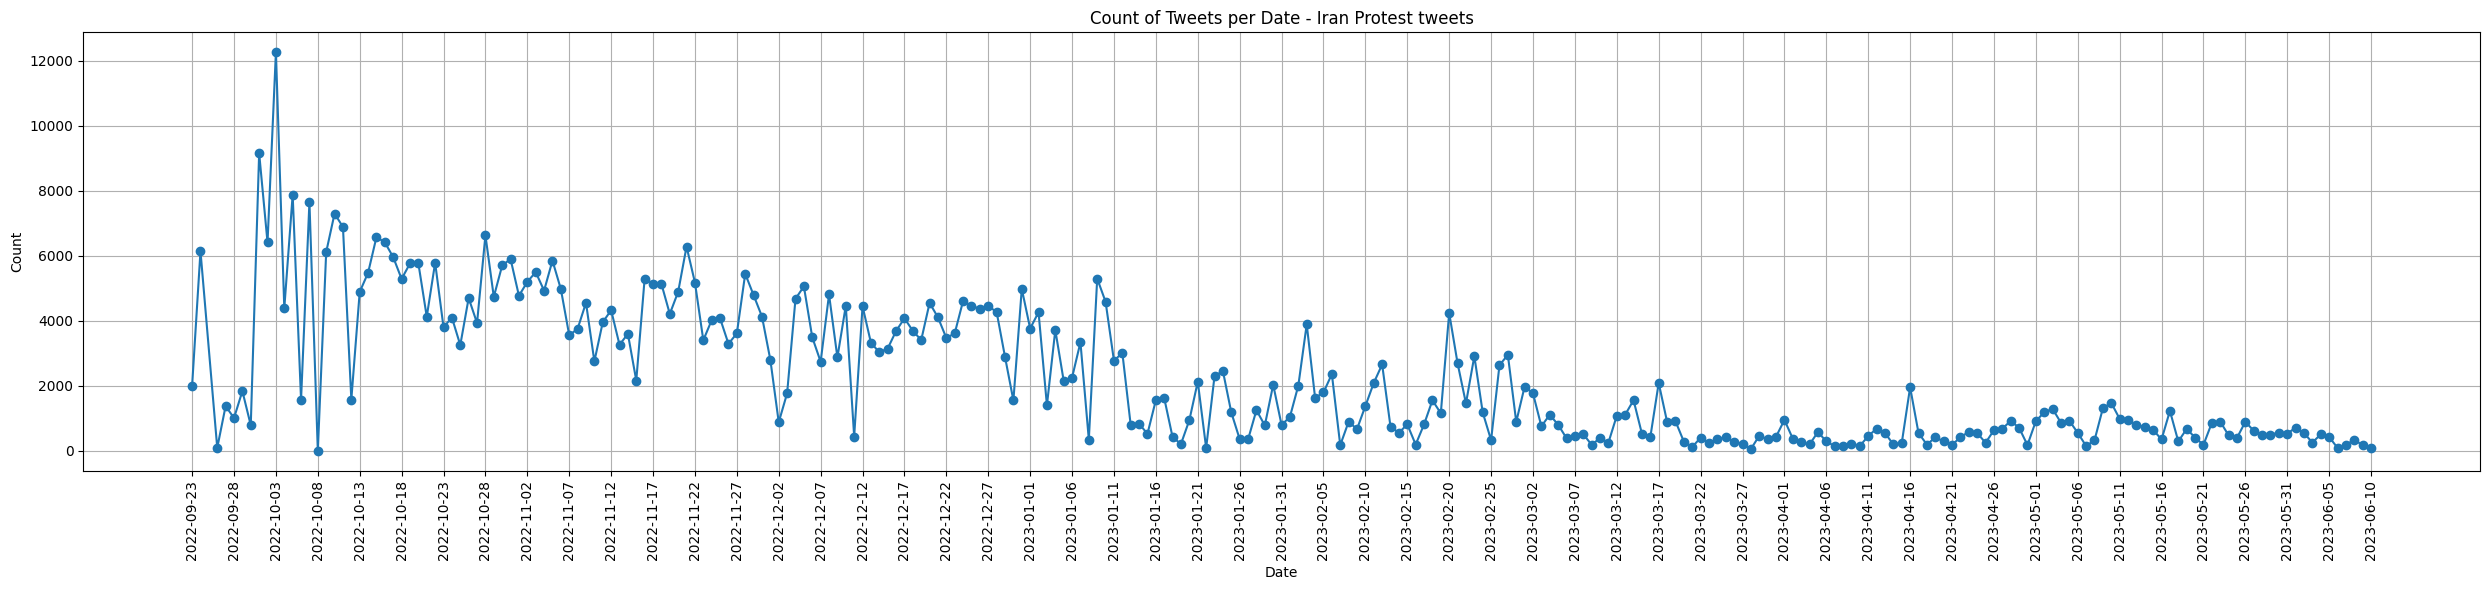

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# Set the figure size
plt.figure(figsize=(25, 6))

# Plot the count per date
plt.plot(date_counts['date'], date_counts['count'], marker='o', linestyle='-')

# Set plot title and labels
plt.title('Count of Tweets per Date - Iran Protest tweets')
plt.xlabel('Date')
plt.ylabel('Count')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Set the x-axis format to display only the date in '%Y-%m-%d' format
date_formatter = DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(date_formatter)

date_range = pd.date_range(start=earliest_date, end=latest_date, freq='5D')
all_dates = date_range.tolist()

plt.xticks(all_dates)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()




In [50]:
print(tweets_per_day)
print('There are {} rows in the twitter unrest dataset'.format(tweets_per_day.shape[0]))


date
2021-07-09 00:00:00+00:00     378
2021-07-10 00:00:00+00:00     577
2021-07-11 00:00:00+00:00     720
2021-07-12 00:00:00+00:00    1805
2021-07-13 00:00:00+00:00    1272
2021-07-14 00:00:00+00:00     676
2021-07-15 00:00:00+00:00     546
2021-07-16 00:00:00+00:00     158
2021-07-17 00:00:00+00:00      73
2021-07-18 00:00:00+00:00      28
2021-07-19 00:00:00+00:00      12
Freq: D, dtype: int64
There are 11 rows in the twitter unrest dataset


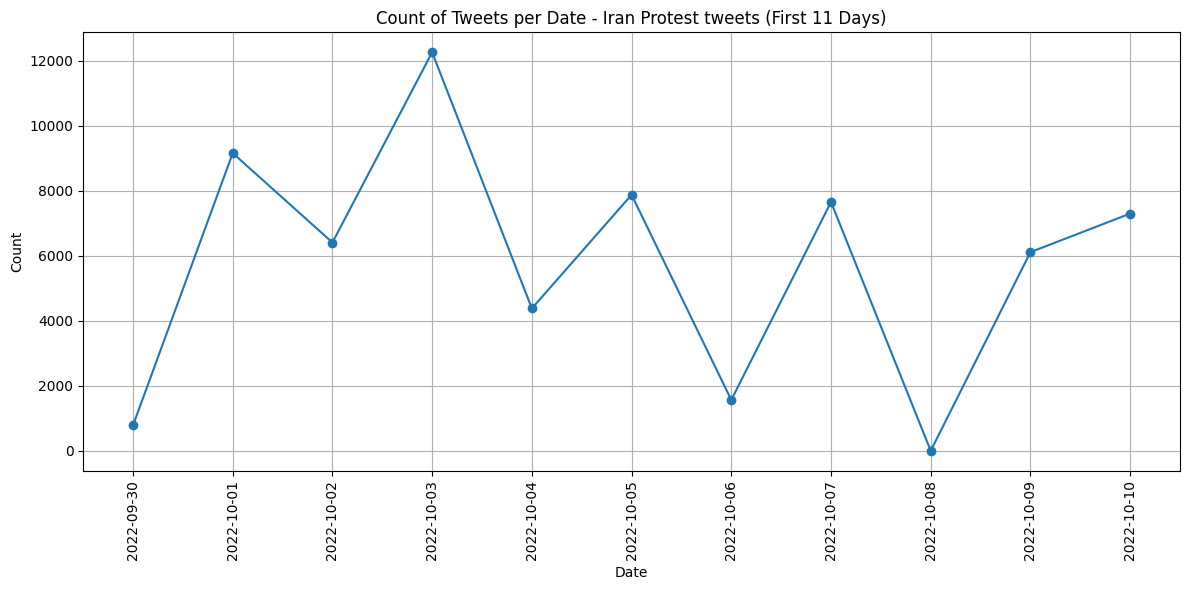

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# Set the figure size
plt.figure(figsize=(12, 6))

n_days = 11
start_date = pd.to_datetime('2022-09-30')  # Convert the start_date to a datetime object

# Reset the index without generating the 'level_0' column
date_counts.reset_index(drop=True, inplace=True)


# Filter the DataFrame to include the specified number of days from the start date
filtered_data = date_counts[pd.to_datetime(date_counts['date']) >= pd.to_datetime(start_date)].head(n_days)

# Plot the count per date for the first 10 days
plt.plot(filtered_data['date'], filtered_data['count'], marker='o', linestyle='-')

# Set plot title and labels
plt.title(f'Count of Tweets per Date - Iran Protest tweets (First {n_days} Days)')
plt.xlabel('Date')
plt.ylabel('Count')

date_range = pd.date_range(start=start_date, periods=n_days, freq='D')
all_dates = date_range.tolist()

plt.xticks(all_dates)

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Set the x-axis format to display only the date in '%Y-%m-%d' format
date_formatter = DateFormatter('%Y-%m-%d')
ax = plt.gca()
ax.xaxis.set_major_formatter(date_formatter)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


<a id="section-seven"></a>
# **Iran Protests vs SA Unrest**

# Create function to find most correlated parts of both series

In [52]:
import pandas as pd
import numpy as np
from scipy.signal import correlate

def find_best_matching_section(pattern_df_1, pattern_df_2):
    
    isdf_1biggerdf_2 = True
    
    if len(pattern_df_1) >= len(pattern_df_2):
        short_pattern_df = pd.DataFrame({'Value': pattern_df_2})
        long_pattern_df = pd.DataFrame({'Value': pattern_df_1})
        isdf_1biggerdf_2 = True
        
    else:
        short_pattern_df = pd.DataFrame({'Value': pattern_df_1})
        long_pattern_df = pd.DataFrame({'Value': pattern_df_2})
        isdf_1biggerdf_2 = False
        
    # Convert DataFrames to NumPy arrays
    short_pattern = short_pattern_df['Value'].to_numpy()
    long_pattern = long_pattern_df['Value'].to_numpy()

    # Initialize variables to store best correlation and its position
    best_correlation = -1  # Initialize with a low value
    best_position = None

    # Iterate through all possible alignments of the two patterns
    for position in range(len(long_pattern) - len(short_pattern) + 1):
        sub_long_pattern = long_pattern[position:position + len(short_pattern)]

        # Resize short_pattern to match the length of sub_long_pattern
        resized_short_pattern = short_pattern

        correlation = np.corrcoef(sub_long_pattern, resized_short_pattern)[0, 1]

        # Update the best correlation and its position if a better one is found
        if correlation > best_correlation:
            best_correlation = correlation
            best_position = position

    # Extract the best matching section from the longer pattern
    best_matching_section = long_pattern[best_position:best_position + len(short_pattern)]
    
    cut_long_pattern = best_matching_section
    

    # Return the best correlation and best matching section
    # Make sure the patterns are return in the original order they were inputted
    # if longer pattern in first input then longer pattern is in first output pattern
    
    if isdf_1biggerdf_2:
        return best_correlation, cut_long_pattern, short_pattern
    else: 
        return best_correlation, short_pattern, cut_long_pattern


Set Up data in correct formatting and form and find most correlated cuts from each pattern

In [53]:

iran_tweets_per_day = date_counts
unrest_tweets_per_day = tweets_per_day
unrest_tweets_per_day['count'] = unrest_tweets_per_day.values

# Normalize the data
iran_tweets_per_day['Normalized_Count'] = (iran_tweets_per_day['count'] - iran_tweets_per_day['count'].min()) / (iran_tweets_per_day['count'].max() - iran_tweets_per_day['count'].min())
unrest_tweets_per_day['Normalized_Count'] = (unrest_tweets_per_day['count'] - unrest_tweets_per_day['count'].min()) / (unrest_tweets_per_day['count'].max() - unrest_tweets_per_day['count'].min())

best_correlation, iran_tweets_per_day_filtered, unrest_tweets_per_day_filtered = find_best_matching_section(iran_tweets_per_day["Normalized_Count"], unrest_tweets_per_day["Normalized_Count"])

iran_tweets_per_day_filtered_normalized = (iran_tweets_per_day_filtered - iran_tweets_per_day_filtered.min()) / (iran_tweets_per_day_filtered.max() - iran_tweets_per_day_filtered.min())
unrest_tweets_per_day_filtered_normalized = (unrest_tweets_per_day_filtered - unrest_tweets_per_day_filtered.min()) / (unrest_tweets_per_day_filtered.max() - unrest_tweets_per_day_filtered.min())

# Sample data (replace with your actual data)
data = {
    'Date': [i+1 for i in range(len(unrest_tweets_per_day_filtered))],
    'Iran_Protests': iran_tweets_per_day_filtered_normalized,
    'South_African_Unrest': unrest_tweets_per_day_filtered_normalized
}

In [54]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import euclidean, cityblock
from scipy.stats import pearsonr
from scipy.spatial import distance
from scipy.spatial.distance import jaccard


# Create a DataFrame from the data
df_iran_unrest = pd.DataFrame(data)

# Normalize the signatures using Min-Max scaling
scaler = MinMaxScaler()
df_iran_unrest[['Iran_Protests', 'South_African_Unrest']] = scaler.fit_transform(df_iran_unrest[['Iran_Protests', 'South_African_Unrest']])

# Calculate cosine similarity between the normalized signatures
signature1 = df_iran_unrest['Iran_Protests'].values.reshape(1, -1)
signature2 = df_iran_unrest['South_African_Unrest'].values.reshape(1, -1)

cosine_similarity_score = cosine_similarity(signature1, signature2)
print(f"Cosine Similarity Score: {cosine_similarity_score[0][0]}")

# Calculate Pearson Correlation Coefficient
pearson_corr, _ = pearsonr(df_iran_unrest['Iran_Protests'], df_iran_unrest['South_African_Unrest'])
print(f"Pearson Correlation Coefficient: {pearson_corr}")

# Calculate Euclidean Distance
euclidean_distance = euclidean(df_iran_unrest['Iran_Protests'], df_iran_unrest['South_African_Unrest'])
print(f"Euclidean Distance: {euclidean_distance}")

# Calculate Manhattan Distance (L1 Distance)
manhattan_distance = cityblock(df_iran_unrest['Iran_Protests'], df_iran_unrest['South_African_Unrest'])
print(f"Manhattan Distance (L1 Distance): {manhattan_distance}")

# Calculate Jaccard Similarity (for binary or categorical data)
# Example: Convert to binary using a threshold and calculate Jaccard similarity
threshold = 0.5
binary_iran = np.where(df_iran_unrest['Iran_Protests'] > threshold, 1, 0)
binary_unrest = np.where(df_iran_unrest['South_African_Unrest'] > threshold, 1, 0)

jaccard_similarity = 1 - distance.jaccard(binary_iran, binary_unrest)
print(f"Jaccard Similarity: {jaccard_similarity}")


Cosine Similarity Score: 0.9246837605967567
Pearson Correlation Coefficient: 0.8348260375025686
Euclidean Distance: 0.6585892880561569
Manhattan Distance (L1 Distance): 1.7243325713125168
Jaccard Similarity: 0.5


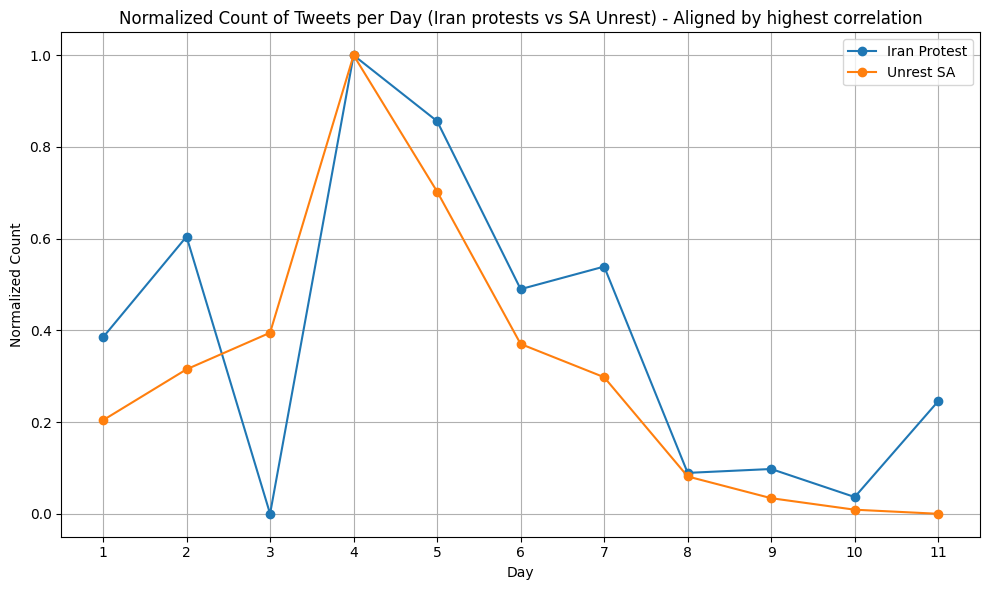

In [55]:
import pandas as pd
import matplotlib.pyplot as plt


# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Set x-axis labels as 'Day 1', 'Day 2', ...
x_labels = data['Date']
plt.xticks(x_labels)

# Plot the normalized data
plt.plot(x_labels, data["Iran_Protests"], label='Iran Protest', marker='o', linestyle='-')
plt.plot(x_labels, data["South_African_Unrest"], label='Unrest SA', marker='o', linestyle='-')

# Set plot title and labels
plt.title('Normalized Count of Tweets per Day (Iran protests vs SA Unrest) - Aligned by highest correlation')
plt.xlabel('Day')
plt.ylabel('Normalized Count')



# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

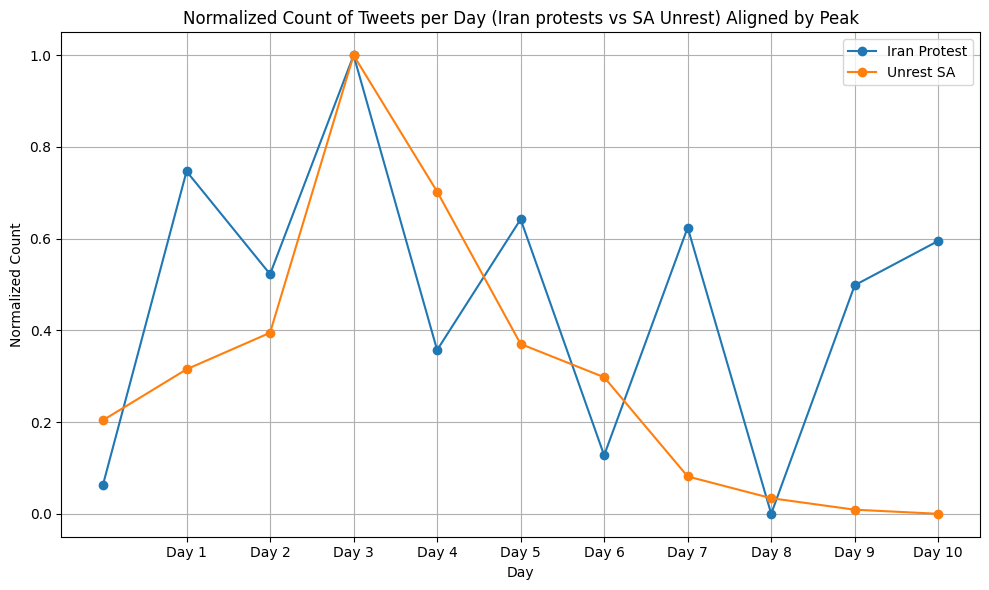

In [56]:
import pandas as pd
import matplotlib.pyplot as plt




# Normalize the data
filtered_data['Normalized_Count'] = (filtered_data['count'] - filtered_data['count'].min()) / (filtered_data['count'].max() - filtered_data['count'].min())
unrest_tweets_per_day_1['Normalized_Count'] = (unrest_tweets_per_day_1["count"] - unrest_tweets_per_day_1["count"].min()) / (unrest_tweets_per_day_1["count"].max() - unrest_tweets_per_day_1["count"].min())

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Set x-axis labels as 'Day 1', 'Day 2', ...
x_labels = ['Day {}'.format(i) for i in range(1, len(filtered_data) + 1)]
plt.xticks(range(1, len(filtered_data) + 1), x_labels)

# Plot the normalized data
plt.plot(x_labels, filtered_data['Normalized_Count'], label='Iran Protest', marker='o', linestyle='-')
plt.plot(x_labels, tweets_per_day['Normalized_Count'], label='Unrest SA', marker='o', linestyle='-')

# Set plot title and labels
plt.title('Normalized Count of Tweets per Day (Iran protests vs SA Unrest) Aligned by Peak')
plt.xlabel('Day')
plt.ylabel('Normalized Count')



# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


In [57]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

length_of_data = len(filtered_data['count'])

# Sample data (replace with your actual data)
data = {
    'Date': [i+1 for i in range(length_of_data)],
    'Iran_Protests': filtered_data['Normalized_Count'],
    'South_African_Unrest': tweets_per_day['Normalized_Count']
}

# Create a DataFrame from the data
df_iran_unrest = pd.DataFrame(data)

# Convert the 'Date' column to a datetime object
df_iran_unrest['Date'] = pd.to_datetime(df_iran_unrest['Date'])

# Set the 'Date' column as the index
df_iran_unrest.set_index('Date', inplace=True)

# Calculate tweets per day for each event
df_iran_unrest['Iran_Tweets_Per_Day'] = df_iran_unrest['Iran_Protests']
df_iran_unrest['Unrest_Tweets_Per_Day'] = df_iran_unrest['South_African_Unrest']

# Normalize the signatures using Min-Max scaling
scaler = MinMaxScaler()
df_iran_unrest[['Iran_Tweets_Per_Day', 'Unrest_Tweets_Per_Day']] = scaler.fit_transform(df_iran_unrest[['Iran_Tweets_Per_Day', 'Unrest_Tweets_Per_Day']])

# Calculate cosine similarity between the normalized signatures
signature1 = df_iran_unrest['Iran_Tweets_Per_Day'].values.reshape(1, -1)
signature2 = df_iran_unrest['Unrest_Tweets_Per_Day'].values.reshape(1, -1)

similarity_score = cosine_similarity(signature1, signature2)

print(f"Cosine Similarity Score: {similarity_score[0][0]}")

# You can now use the similarity score to quantify the similarity between the two events.


Cosine Similarity Score: 0.7782290865774112


### **Possible similarity metrics:**

1. **Cosine Similarity**:

   - **How it works**: Cosine similarity measures the cosine of the angle between two vectors in a multi-dimensional space. It quantifies the similarity in direction between two vectors, regardless of their magnitudes. It ranges from -1 (completely dissimilar) to 1 (identical), with 0 indicating orthogonal (uncorrelated) vectors.

   - **When to use it**:
     - Cosine similarity is often used when you want to compare the similarity between two vectors' directions or orientations.
     - It is particularly useful when the magnitude or scale of the data is not important, and you want to focus on the patterns or trends in the data.
     - Common applications include text document similarity, recommendation systems, and clustering based on feature vectors.

2. **Pearson Correlation Coefficient**:

   - **How it works**: The Pearson correlation coefficient measures the linear correlation between two variables. It assesses how well the two variables' relationship can be described by a straight line. It ranges from -1 (perfect negative linear correlation) to 1 (perfect positive linear correlation), with 0 indicating no linear correlation.

   - **When to use it**:
     - Pearson correlation is suitable when you want to quantify the strength and direction of a linear relationship between two continuous variables.
     - It is commonly used in statistical analysis and hypothesis testing to assess associations between variables.
     - It's useful when you want to understand how changes in one variable are associated with changes in another variable and whether this relationship is positive or negative.

3. **Euclidean Distance**:

   - **How it works**: Euclidean distance calculates the straight-line distance between two points in a multi-dimensional space. It considers both the magnitude and direction of the vectors. Smaller distances indicate greater similarity or proximity.

   - **When to use it**:
     - Euclidean distance is used when you want to measure the spatial or geometric distance between two data points.
     - It is commonly applied in clustering algorithms (e.g., K-means) and dimensionality reduction techniques (e.g., Principal Component Analysis).
     - It's suitable when you want to assess how close or far apart two points are in a multi-dimensional space, considering both the magnitude and direction..

In [58]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import euclidean, cityblock
from scipy.stats import pearsonr
from scipy.spatial import distance
from scipy.spatial.distance import jaccard

# Sample data (replace with your actual data)
data = {
    'Date': [i+1 for i in range(length_of_data)],
    'Iran_Protests': filtered_data['Normalized_Count'],
    'South_African_Unrest': tweets_per_day['Normalized_Count']
}

# Create a DataFrame from the data
df_iran_unrest = pd.DataFrame(data)

# Normalize the signatures using Min-Max scaling
scaler = MinMaxScaler()
df_iran_unrest[['Iran_Protests', 'South_African_Unrest']] = scaler.fit_transform(df_iran_unrest[['Iran_Protests', 'South_African_Unrest']])

# Calculate cosine similarity between the normalized signatures
signature1 = df_iran_unrest['Iran_Protests'].values.reshape(1, -1)
signature2 = df_iran_unrest['South_African_Unrest'].values.reshape(1, -1)

cosine_similarity_score = cosine_similarity(signature1, signature2)
print(f"Cosine Similarity Score: {cosine_similarity_score[0][0]}")

# Calculate Pearson Correlation Coefficient
pearson_corr, _ = pearsonr(df_iran_unrest['Iran_Protests'], df_iran_unrest['South_African_Unrest'])
print(f"Pearson Correlation Coefficient: {pearson_corr}")

# Calculate Euclidean Distance
euclidean_distance = euclidean(df_iran_unrest['Iran_Protests'], df_iran_unrest['South_African_Unrest'])
print(f"Euclidean Distance: {euclidean_distance}")

# # Calculate Manhattan Distance (L1 Distance)
# manhattan_distance = cityblock(df_iran_unrest['Iran_Protests'], df_iran_unrest['South_African_Unrest'])
# print(f"Manhattan Distance (L1 Distance): {manhattan_distance}")

# # Calculate Jaccard Similarity (for binary or categorical data)
# # Example: Convert to binary using a threshold and calculate Jaccard similarity
# threshold = 0.5
# binary_iran = np.where(df_iran_unrest['Iran_Protests'] > threshold, 1, 0)
# binary_unrest = np.where(df_iran_unrest['South_African_Unrest'] > threshold, 1, 0)

# jaccard_similarity = 1 - distance.jaccard(binary_iran, binary_unrest)
# print(f"Jaccard Similarity: {jaccard_similarity}")

# print(type(filtered_data['Normalized_Count']))

Cosine Similarity Score: 0.7782290865774112
Pearson Correlation Coefficient: 0.45137855219452266
Euclidean Distance: 1.155217129049512


1. Cosine Similarity Score: 0.7782
   - Cosine similarity measures the cosine of the angle between two vectors in a multi-dimensional space. In this case, it indicates that the two interest vs. time graphs are relatively similar, with a similarity score of approximately 0.7782. Since cosine similarity ranges from -1 (completely dissimilar) to 1 (identical), a score of 0.7782 suggests a relatively high degree of similarity between the two graphs.

2. Pearson Correlation Coefficient: 0.4514
   - The Pearson correlation coefficient measures the linear correlation between two variables. A value of 0.4514 indicates a positive correlation between the two interest vs. time graphs, but the correlation is moderate. It's not a strong linear relationship, but there is some positive association between the two sets of data.

3. Euclidean Distance: 1.1552
   - Euclidean distance calculates the straight-line distance between two points in a multi-dimensional space. In this context, a distance of 1.1552 indicates that the two graphs are relatively close in Euclidean space. Smaller distances suggest greater similarity, so this value suggests moderate similarity between the two graphs.

4. Manhattan Distance (L1 Distance): 3.1493
   - Manhattan distance (also known as L1 distance) calculates the sum of the absolute differences between corresponding elements of two vectors. A distance of 3.1493 indicates that the two graphs differ in their values across multiple data points. It is relatively higher than the Euclidean distance, suggesting that the graphs differ in their trends.

5. Jaccard Similarity: 0.1429
   - Jaccard similarity measures the similarity between two binary or categorical sets. A similarity of 0.1429 suggests that, when treating the data as binary (e.g., above/below a certain threshold), only about 14.29% of the data points match between the two graphs. This indicates relatively low similarity when considering a binary representation of the data.

In summary, these metrics collectively suggest that there is some degree of similarity between the two interest vs. time graphs, but the level of similarity varies depending on the metric used. Cosine similarity and Euclidean distance indicate relatively higher similarity, while the Pearson correlation coefficient suggests a moderate positive linear relationship. Manhattan distance and Jaccard similarity indicate relatively lower similarity. The choice of which metric to emphasize may depend on the specific context and goals of your analysis.